In [1]:
import matplotlib
import uproot, uproot3
import numpy
import awkward
import numba
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as pd
from tqdm import tqdm,trange
import ROOT
import os,sys
from array import array
from copy import deepcopy

Welcome to JupyROOT 6.22/08


## Lumi

In [2]:
# CMS_lumi
#   Initiated by: Gautier Hamel de Monchenault (Saclay)
#   Translated in Python by: Joshua Hardenbrook (Princeton)
#   Updated by:   Dinko Ferencek (Rutgers)
#

cmsText     = "CMS";
cmsTextFont   = 62  

writeExtraText = True
extraText   = "Preliminary"
extraTextFont = 52 

lumiTextSize     = 0.30
lumiTextOffset   = 0.2

cmsTextSize      = 0.45
cmsTextOffset    = 0.1

relPosX    = 0.045
relPosY    = 0.035
relExtraDY = 1.2

extraOverCmsTextSize  = 0.76

lumi_13TeV = "20.1 fb^{-1}"
lumi_8TeV  = "19.7 fb^{-1}" 
lumi_7TeV  = "5.1 fb^{-1}"
lumi_sqrtS = "(13 TeV)"

drawLogo      = False

def CMS_lumi(pad,  iPeriod,  iPosX ):
    outOfFrame    = False
    if(iPosX/10==0 ): outOfFrame = True

    alignY_=3
    alignX_=2
    if( iPosX/10==0 ): alignX_=1
    if( iPosX==0    ): alignY_=1
    if( iPosX/10==1 ): alignX_=1
    if( iPosX/10==2 ): alignX_=2
    if( iPosX/10==3 ): alignX_=3
    align_ = 10*alignX_ + alignY_

    H = pad.GetWh()
    W = pad.GetWw()
    l = pad.GetLeftMargin()
    t = pad.GetTopMargin()
    r = pad.GetRightMargin()
    b = pad.GetBottomMargin()
    e = 0.025

    pad.cd()

    lumiText = ""
    if( iPeriod==1 ):
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==2 ):
        lumiText += lumi_8TeV
        lumiText += " (8 TeV)"

    elif( iPeriod==3 ):      
        lumiText = lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==4 ):
        lumiText += lumi_13TeV
        lumiText += " (13 TeV)"
    elif ( iPeriod==7 ):
        if( outOfFrame ):lumiText += "#scale[0.85]{"
        lumiText += lumi_13TeV 
        lumiText += " (13 TeV)"
        lumiText += " + "
        lumiText += lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
        if( outOfFrame): lumiText += "}"
    elif ( iPeriod==12 ):
        lumiText += "8 TeV"
    elif ( iPeriod==0 ):
        lumiText += lumi_sqrtS
            
    print (lumiText)

    latex = ROOT.TLatex()
    latex.SetNDC()
    latex.SetTextAngle(0)
    latex.SetTextColor(ROOT.kBlack)    
    
    extraTextSize = extraOverCmsTextSize*cmsTextSize
    
    latex.SetTextFont(42)
    latex.SetTextAlign(31) 
    latex.SetTextSize(lumiTextSize*t)    

    latex.DrawLatex(1-r,1-t+lumiTextOffset*t,lumiText)

    if( outOfFrame ):
        latex.SetTextFont(cmsTextFont)
        latex.SetTextAlign(11) 
        latex.SetTextSize(cmsTextSize*t)    
        latex.DrawLatex(l,1-t+lumiTextOffset*t,cmsText)
  
    pad.cd()

    posX_ = 0
    if( iPosX%10<=1 ):
        posX_ =   l + relPosX*(1-l-r)
    elif( iPosX%10==2 ):
        posX_ =  l + 0.5*(1-l-r)
    elif( iPosX%10==3 ):
        posX_ =  1-r - relPosX*(1-l-r)

    posY_ = 1-t - relPosY*(1-t-b)

    if( not outOfFrame ):
        if( drawLogo ):
            posX_ =   l + 0.045*(1-l-r)*W/H
            posY_ = 1-t - 0.045*(1-t-b)
            xl_0 = posX_
            yl_0 = posY_ - 0.15
            xl_1 = posX_ + 0.15*H/W
            yl_1 = posY_
            CMS_logo = ROOT.TASImage("CMS-BW-label.png")
            pad_logo =  ROOT.TPad("logo","logo", xl_0, yl_0, xl_1, yl_1 )
            pad_logo.Draw()
            pad_logo.cd()
            CMS_logo.Draw("X")
            pad_logo.Modified()
            pad.cd()          
        else:
            latex.SetTextFont(cmsTextFont)
            latex.SetTextSize(cmsTextSize*t)
            latex.SetTextAlign(align_)
            latex.DrawLatex(posX_, posY_, cmsText)
            if( writeExtraText ) :
                latex.SetTextFont(extraTextFont)
                latex.SetTextAlign(align_)
                latex.SetTextSize(extraTextSize*t)
                latex.DrawLatex(posX_, posY_- relExtraDY*cmsTextSize*t, extraText)
    elif( writeExtraText ):
        if( iPosX==0):
            posX_ =   l +  relPosX*(1-l-r) + 0.02
            posY_ =   1-t+lumiTextOffset*t

        latex.SetTextFont(extraTextFont)
        latex.SetTextSize(extraTextSize*t)
        latex.SetTextAlign(align_)
        latex.DrawLatex(posX_+0.10, posY_, extraText)      

    pad.Update()

## tdrstyle

In [3]:
tdrStyle =  ROOT.TStyle("","")

#for the canvas:
tdrStyle.SetCanvasBorderMode(0)
tdrStyle.SetCanvasColor(ROOT.kWhite)
tdrStyle.SetCanvasDefH(1000) #Height of canvas
tdrStyle.SetCanvasDefW(800) #Width of canvas
tdrStyle.SetCanvasDefX(0)   #POsition on screen
tdrStyle.SetCanvasDefY(0)


tdrStyle.SetPadBorderMode(0)
#tdrStyle.SetPadBorderSize(Width_t size = 1)
tdrStyle.SetPadColor(ROOT.kWhite)
tdrStyle.SetPadGridX(False)
tdrStyle.SetPadGridY(False)
tdrStyle.SetGridColor(0)
tdrStyle.SetGridStyle(3)
tdrStyle.SetGridWidth(1)

#For the frame:
tdrStyle.SetFrameBorderMode(1)
tdrStyle.SetFrameBorderSize(1)
tdrStyle.SetFrameFillColor(0)
tdrStyle.SetFrameFillStyle(0)
tdrStyle.SetFrameLineColor(1)
tdrStyle.SetFrameLineStyle(1)
tdrStyle.SetFrameLineWidth(1)

#For the histo:
#tdrStyle.SetHistFillColor(1)
#tdrStyle.SetHistFillStyle(0)
tdrStyle.SetHistLineColor(1)
tdrStyle.SetHistLineStyle(0)
tdrStyle.SetHistLineWidth(1)
#tdrStyle.SetLegoInnerR(Float_t rad = 0.5)
#tdrStyle.SetNumberContours(Int_t number = 20)

tdrStyle.SetEndErrorSize(2)
#tdrStyle.SetErrorMarker(20)
#tdrStyle.SetErrorX(0.)

tdrStyle.SetMarkerStyle(20)

#For the fit/function:
tdrStyle.SetOptFit(1)
tdrStyle.SetFitFormat("5.4g")
tdrStyle.SetFuncColor(2)
tdrStyle.SetFuncStyle(1)
tdrStyle.SetFuncWidth(1)

#For the date:
tdrStyle.SetOptDate(0)
# tdrStyle.SetDateX(Float_t x = 0.01)
# tdrStyle.SetDateY(Float_t y = 0.01)

# For the statistics box:
tdrStyle.SetOptFile(0)
tdrStyle.SetOptStat(0) # To display the mean and RMS:   SetOptStat("mr")
tdrStyle.SetStatColor(ROOT.kWhite)
tdrStyle.SetStatFont(42)
tdrStyle.SetStatFontSize(0.025)
tdrStyle.SetStatTextColor(1)
tdrStyle.SetStatFormat("6.4g")
tdrStyle.SetStatBorderSize(1)
tdrStyle.SetStatH(0.1)
tdrStyle.SetStatW(0.15)
# tdrStyle.SetStatStyle(Style_t style = 1001)
# tdrStyle.SetStatX(Float_t x = 0)
# tdrStyle.SetStatY(Float_t y = 0)

# Margins:
tdrStyle.SetPadTopMargin(0.11)
tdrStyle.SetPadBottomMargin(0.11)
tdrStyle.SetPadLeftMargin(0.13)
tdrStyle.SetPadRightMargin(0.15)

# For the Global title:

tdrStyle.SetOptTitle(0)
tdrStyle.SetTitleFont(42)
tdrStyle.SetTitleColor(1)
tdrStyle.SetTitleTextColor(1)
tdrStyle.SetTitleFillColor(10)
tdrStyle.SetTitleFontSize(0.05)
# tdrStyle.SetTitleH(0) # Set the height of the title box
# tdrStyle.SetTitleW(0) # Set the width of the title box
# tdrStyle.SetTitleX(0) # Set the position of the title box
# tdrStyle.SetTitleY(0.985) # Set the position of the title box
# tdrStyle.SetTitleStyle(Style_t style = 1001)
# tdrStyle.SetTitleBorderSize(2)

# For the axis titles:

tdrStyle.SetTitleColor(1, "XYZ")
tdrStyle.SetTitleFont(42, "XYZ")
tdrStyle.SetTitleSize(0.04, "XYZ")
#   tdrStyle.SetTitleXSize(Float_t size = 0.02) # Another way to set the size?
#   tdrStyle.SetTitleYSize(Float_t size = 0.02)
tdrStyle.SetTitleXOffset(0.9)
tdrStyle.SetTitleYOffset(1.25)
# tdrStyle.SetTitleOffset(1.1, "Y") # Another way to set the Offset

# For the axis labels:

tdrStyle.SetLabelColor(1, "XYZ")
tdrStyle.SetLabelFont(42, "XYZ")
tdrStyle.SetLabelOffset(0.007, "XYZ")
tdrStyle.SetLabelSize(0.03, "XYZ")

# For the axis:

tdrStyle.SetAxisColor(1, "XYZ")
tdrStyle.SetStripDecimals(True)
tdrStyle.SetTickLength(0.03, "XYZ")
tdrStyle.SetNdivisions(510, "XYZ")
tdrStyle.SetPadTickX(1)  # To get tick marks on the opposite side of the frame
tdrStyle.SetPadTickY(1)

# Change for log plots:
tdrStyle.SetOptLogx(0)
tdrStyle.SetOptLogy(0)
tdrStyle.SetOptLogz(0)

# Postscript options:
# tdrStyle.SetPaperSize(20.,20.)
# tdrStyle.SetLineScalePS(Float_t scale = 3)
# tdrStyle.SetLineStyleString(Int_t i, const char* text)
# tdrStyle.SetHeaderPS(const char* header)
# tdrStyle.SetTitlePS(const char* pstitle)

# tdrStyle.SetBarOffset(Float_t baroff = 0.5)
# tdrStyle.SetBarWidth(Float_t barwidth = 0.5)
# tdrStyle.SetPaintTextFormat(const char* format = "g")
# tdrStyle.SetPalette(Int_t ncolors = 0, Int_t* colors = 0)
# tdrStyle.SetTimeOffset(Double_t toffset)
# tdrStyle.SetHistMinimumZero(kTRUE)

tdrStyle.SetHatchesLineWidth(1)
tdrStyle.SetHatchesSpacing(0.5)

tdrStyle.cd()

## ratio function

In [4]:
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad
from ROOT import kBlack, kBlue, kRed

def createRatio(h1, h2):
    h3 = h1.Clone("h3")
    h3.SetLineColor(kBlack)
    h3.SetMarkerStyle(21)
    h3.SetTitle("")
    h3.SetMinimum(0.50)
    h3.SetMaximum(1.50)
    # Set up plot for markers and errors
    h3.Sumw2()
    h3.SetStats(0)
    h3.Divide(h2)

    # Adjust y-axis settings
    y = h3.GetYaxis()
    y.SetTitle("Data / MC ")
    y.SetNdivisions(103)
    y.SetTitleSize(35)
    y.SetTitleFont(43)
    y.SetTitleOffset(1.50)
    y.SetLabelFont(43)
    y.SetLabelSize(35)

    # Adjust x-axis settings
    x = h3.GetXaxis()
    x.SetTitleSize(35)
    x.SetTitleFont(43)
    x.SetTitleOffset(4.5)
    x.SetLabelFont(43)
    x.SetLabelSize(35)

    return h3


## Truth variables test

In [70]:
# file = "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/zhcc_tree.root"

def AddHist(file, hist, variable):
    sumpt_branches = uproot.open(file+':Events').keys(filter_name='fj*sumpt*')
    npart_branches = uproot.open(file+':Events').keys(filter_name='fj*part*')
    qualified_branches = uproot.open(file+':Events').keys(filter_name='fj*qualified*')
    tau_branches = uproot.open(file+':Events').keys(filter_name='fj*Tau*')
#     gen_branches = ['xsecWeight']
    branches = ['passHTTrig',
                'fj_1_pt',
                'fj_1_sdmass',
                'passmetfilters',
               ]
#     branches.extend(gen_branches)
#     branches = set(sumpt_branches + gen_branches + npart_branches + qualified_branches)
    branches = set(branches + sumpt_branches + npart_branches + qualified_branches + tau_branches)
    arrays = uproot.open(file+':Events').arrays(branches, library='pd')

    sel = 'fj_1_is_qualified==1 & passmetfilters==1 & passHTTrig==1 & fj_1_pt>200 & fj_1_sdmass>50 & fj_1_sdmass<200'
    arrays = arrays.query(sel).copy()
#     fj1_qual_cut = arrays.loc[:,'fj_1_is_qualified'] == True
#     arrays = arrays.loc[fj1_qual_cut , :]

#     arrays['fj1_ptg_ptgq'] = arrays[variable]/arrays['fj_1_part_sumpt']
#     arrays['fj2_ptg_ptgq'] = arrays[variable]/arrays['fj_2_part_sumpt']

    # Fill fj2 to NaN fj1
#     arrays['fj1_ptg_ptgq'].fillna(arrays['fj2_ptg_ptgq'], inplace=True)
    arrays['tau'] = arrays['fj_1_matchedInitHadsTau3']/arrays['fj_1_matchedInitHadsTau2']
    var1 = 'tau'
#     var2 = 'fj2_ptg_ptgq'
    
    for i in trange(0, len(arrays[var1]), desc=f'fill {var1} for {file}'):
        if (arrays[var1].values[i]) or (arrays[var1].values[i] == 0):
#             hist.Fill(float(arrays[var1].values[i]), float(arrays['xsecWeight'].values[i]))
            hist.Fill(float(arrays[var1].values[i]))
            
#     for i in trange(0, len(arrays[var2]), desc=f'fill {var2} for {file}'):
#         if arrays[var2].values[i]:
#             hist.Fill(float(arrays[var2].values[i]), float(arrays['xsecWeight'].values[i]))
    hist.Scale(1./hist.Integral())

files = [
    '/eos/user/s/sdeng/sfbdt/221027/bsm-higgs_tree.root',
    '/eos/user/s/sdeng/sfbdt/221027/qcd-bbb-enriched_tree.root',
    '/eos/user/s/sdeng/sfbdt/221027/qcd-ccc-enriched_tree.root',
#     '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/qcd-mg_tree.root',
#     '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/zhcc_tree.root',
#     '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/zhbb_tree.root',
#     '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/test.root',
#     "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/zhcc_tree.root",
#     "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/zhbb_tree.root",
#     "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/qcd-mg_tree.root",
]

hists_ini = {}
# flavor = 'g'
# variable = f'fj_1_{flavor}part_sumpt'
# variable = f'fj_1_{flavor}part_sumpt'
variable = 'NONE'
for file in files:
    hists_ini[file] = {}
    hists_ini[file]['hist'] = ROOT.TH1D("","", 20, 0, 1.1)
    AddHist(file, hists_ini[file]['hist'], variable)

fill tau for /eos/user/s/sdeng/sfbdt/221027/bsm-higgs_tree.root: 100%|██████████| 22287/22287 [00:00<00:00, 196256.32it/s]
fill tau for /eos/user/s/sdeng/sfbdt/221027/qcd-bbb-enriched_tree.root: 100%|██████████| 25944/25944 [00:00<00:00, 199180.75it/s]
fill tau for /eos/user/s/sdeng/sfbdt/221027/qcd-ccc-enriched_tree.root: 100%|██████████| 14157/14157 [00:00<00:00, 194020.34it/s]


(13 TeV)


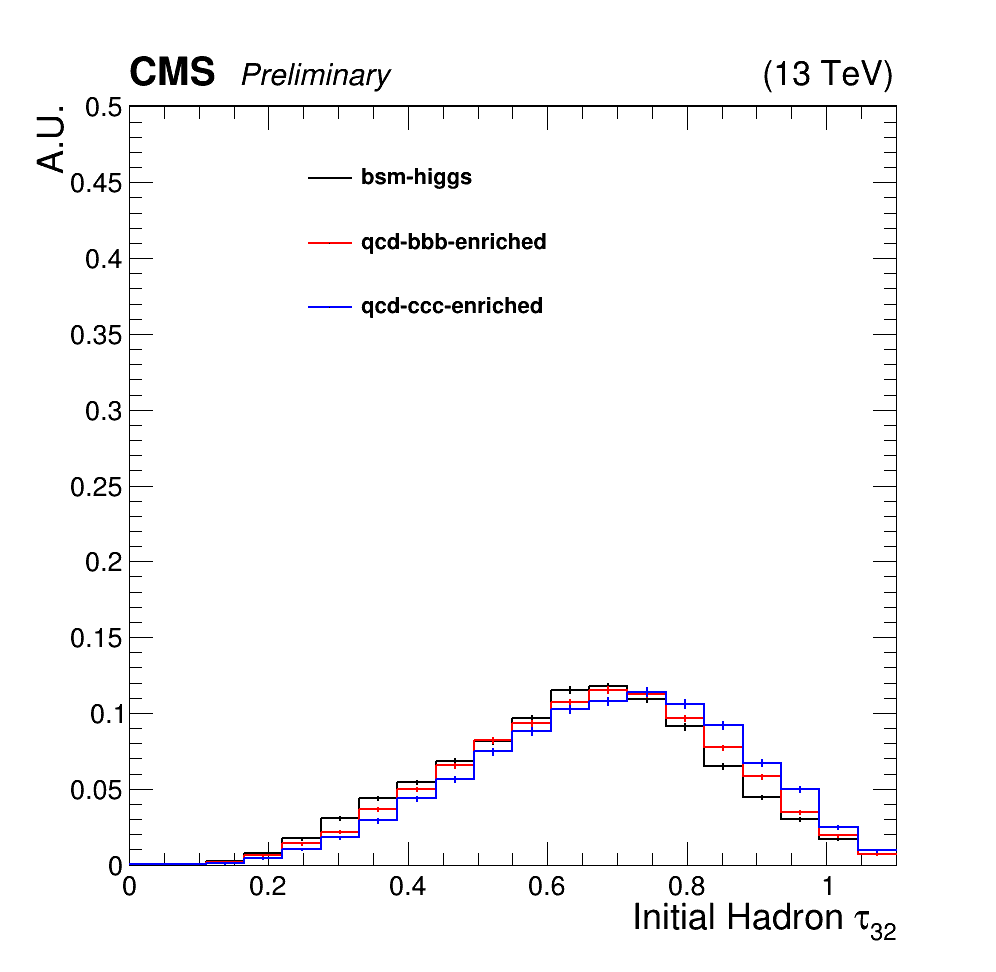

In [72]:
# print(hists)
hists = deepcopy(hists_ini)
c1 = ROOT.TCanvas("","",1000,1000)
c1.Draw()

legend = ROOT.TLegend(0.30, 0.65, 0.55, 0.85)
# legend.SetNColumns(3)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.025)
legend.SetLineWidth(1)
legend.SetLineStyle(0)

color = 1
for hist in hists:
    legend.AddEntry(hists[hist]['hist'], hist.split('/')[len(hist.split('/'))-1].rstrip('_tree.root'))
    hists[hist]['hist'].Scale(1./hists[hist]['hist'].Integral())
    hists[hist]['hist'].SetMarkerStyle(0)
    hists[hist]['hist'].SetLineColor(color)
    hists[hist]['hist'].SetLineWidth(2)
#     hists[hist]['hist'].SetXTitle(f'gen-parton #Sigmap_{{T}}({flavor})/#Sigmap_{{T}}({flavor},p)')
    hists[hist]['hist'].SetXTitle(f'Initial Hadron #tau_{{32}}')
    hists[hist]['hist'].SetYTitle('A.U.')
    hists[hist]['color'] = color
    if color == 1:
        hists[hist]['hist'].Draw("HIST e")
        hists[hist]['hist'].SetMaximum(0.5)
    else:
        hists[hist]['hist'].Draw("HIST e SAME")
    color += 1
    if color == 3 : color += 1
legend.Draw("SAME")
    
CMS_lumi(c1,0,0)
ROOT.gStyle.SetPadRightMargin(0.10)
# c1.SaveAs(f'/eos/user/s/sdeng/www/220518_jet_gp_test/{flavor}_ptratio_2bp.png')
# c1.SaveAs(f'/eos/user/s/sdeng/www/221027_jet_had_test/tau21.png')
# arrays[['fj1_ptg_ptgq','fj2_ptg_ptgq']]

## pnet score check

In [ ]:
cuts = {
    'cut1':{
        'name': 'design 1',
        'sigexpr': 'fj_1_gpart_ptratio < 0.10',
        'bkgexpr': 'fj_1_gpart_ptratio > 0.75'
    },
    'cut2':{
        'name': 'design 2',
        'sigexpr': '(fj_1_npart <= 2 & (fj_1_bpart_ptratio > 0.90 | fj_1_cpart_ptratio > 0.90)) | (fj_1_npart > 2 & (fj_1_bpart_ptratio > 0.70 | fj_1_cpart_ptratio > 0.70))',
        'bkgexpr': '(fj_1_npart <= 2 & (fj_1_bpart_ptratio < 0.30 & fj_1_cpart_ptratio < 0.30)) | (fj_1_npart > 2 & (fj_1_bpart_ptratio < 0.20 & fj_1_cpart_ptratio < 0.20))'
    },
    'cut3':{
        'name': 'design 3',
        'sigexpr': '(fj_1_nbpart == 2 & fj_1_bpart_ptratio > 0.80) | (fj_1_ncpart == 2 & fj_1_cpart_ptratio > 0.80)',
        'bkgexpr': 'fj_1_nbpart != 2 & fj_1_ncpart != 2 & fj_1_gpart_ptratio > 0.75'
    }
}

def check_pnet(file, sigexpr, bkgexpr, var):
    x = 1
#     basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & (fj_{x}_nbhadrons>=2 | fj_{x}_nchadrons>=2) & fj_{x}_is_qualified'
    basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_nchadrons>0 & fj_{x}_nbhadrons==0 & fj_{x}_is_qualified'
#     basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_nbhadrons>0 & fj_{x}_is_qualified'
    
    train_vars = [
        f'fj_{x}_tau21',
        f'fj_{x}_sj1_rawmass',
        f'fj_{x}_sj2_rawmass',
        f'fj_{x}_ntracks_sv12',
        f'fj_{x}_sj1_sv1_pt',
        f'fj_{x}_sj2_sv1_pt',
    ]
    obs_vars = [
        'event',
        'passmetfilters',
        'passHTTrig',
        'ht',
        'xsecWeight',
        f'fj_{x}_dr_Z',
        f'fj_{x}_pt',
        f'fj_{x}_sdmass',
        f'fj_{x}_nbhadrons',
        f'fj_{x}_nchadrons',
        f'fj_{x}_npart',
        f'fj_{x}_nbpart',
        f'fj_{x}_ncpart',
        f'fj_{x}_ngpart',
        f'fj_{x}_is_qualified',
        f'fj_{x}_part_sumpt',
        f'fj_{x}_cpart_sumpt',
        f'fj_{x}_bpart_sumpt',
        f'fj_{x}_gpart_sumpt',
        f'fj_{x}_ParticleNetMD_XccVsQCD',
        f'fj_{x}_ParticleNetMD_XbbVsQCD',
    ]
    add_vars = [
        f'fj_{x}_cpart_ptratio',
        f'fj_{x}_bpart_ptratio',
        f'fj_{x}_gpart_ptratio',
    ]
    
    all_vars = set(train_vars + obs_vars)
    df = uproot.open(file+':Events').arrays(all_vars, library='pd')
    df.query(basesel, inplace=True)
    
    df[f'fj_{x}_gpart_ptratio'] = df.eval(f'fj_{x}_gpart_sumpt/fj_{x}_part_sumpt')
    df[f'fj_{x}_cpart_ptratio'] = df.eval(f'fj_{x}_cpart_sumpt/fj_{x}_part_sumpt')
    df[f'fj_{x}_bpart_ptratio'] = df.eval(f'fj_{x}_bpart_sumpt/fj_{x}_part_sumpt')
    df.query(f'({sigexpr}) | ({bkgexpr})', inplace=True)
    df['is_signal'] = df.eval(sigexpr)
#     print(df.loc[:,['fj_1_nchadrons','fj_1_ncpart','fj_1_nbhadrons','fj_1_nbpart']])
    
    sig_cut = df.loc[:,'is_signal'] == 1
    bkg_cut = df.loc[:,'is_signal'] == 0
    sig = df.loc[sig_cut,:]
    bkg = df.loc[bkg_cut,:]

    h_sig = ROOT.TH1D("","",20,0,1)
    h_bkg = ROOT.TH1D("","",20,0,1)
    
    for i in trange(0, len(sig[var]), desc=f'fill sig {var} for {file}'):
        h_sig.Fill(float(sig[var].values[i]), float(sig['xsecWeight'].values[i]))
    for i in trange(0, len(bkg[var]), desc=f'fill bkg {var} for {file}'):
        h_bkg.Fill(float(bkg[var].values[i]), float(bkg['xsecWeight'].values[i]))
    
    return h_sig, h_bkg
 
    
file = '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/qcd-mg_tree.root'
var = f'fj_1_ParticleNetMD_XccVsQCD'
for cut in cuts:
    cuts[cut]['h_sig'], cuts[cut]['h_bkg'] = check_pnet(file, cuts[cut]['sigexpr'], cuts[cut]['bkgexpr'], var)
    
    
    

In [ ]:
# print(hists)
hists = deepcopy(cuts)
c1 = ROOT.TCanvas("","",1000,1000)
c1.Draw()

legend = ROOT.TLegend(0.60, 0.65, 0.85, 0.85)
# legend.SetNColumns(3)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.025)
legend.SetLineWidth(1)
legend.SetLineStyle(0)

def SetStyle(hist, color, linestyle):
    hist.SetMarkerStyle(0)
    hist.SetLineColor(color)
    hist.SetLineWidth(2)
    hist.SetLineStyle(linestyle)
    hist.SetXTitle(f'{var}')
    hist.SetYTitle('A.U.')

color = 1
for hist in hists:
    legend.AddEntry(hists[hist]['h_sig'], hists[hist]['name']+' sig')
#     legend.AddEntry(hists[hist]['h_bkg'], hists[hist]['name']+' bkg')
    hists[hist]['h_sig'].Scale(1./hists[hist]['h_sig'].Integral())
#     hists[hist]['h_bkg'].Scale(1./hists[hist]['h_bkg'].Integral())
    SetStyle(hists[hist]['h_sig'], color, 1)
#     SetStyle(hists[hist]['h_bkg'], color+20, 1)
    if color == 1:
        hists[hist]['h_sig'].Draw("HIST e")
        hists[hist]['h_sig'].SetMaximum(0.7)
    else:
        hists[hist]['h_sig'].Draw("HIST e SAME")
#     hists[hist]['h_bkg'].Draw("HIST e SAME")
    color += 1
    if color == 3 : color += 1
legend.Draw("SAME")
    
CMS_lumi(c1,0,0)
ROOT.gStyle.SetPadRightMargin(0.05)
# c1.SaveAs(f'/eos/user/s/sdeng/www/220519_jet_gp_test/{var}.png')
# c1.SaveAs(f'/eos/user/s/sdeng/www/221027_jet_had_test/{var}.png')
# ROOT.gPad.SetLogy()

## Truth variables test 2D

In [89]:
# file = "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/zhcc_tree.root"

def AddHist_2d(file, hist, variable1, variable2):
    sumpt_branches = uproot.open(file+':Events').keys(filter_name='fj*sumpt*')
    npart_branches = uproot.open(file+':Events').keys(filter_name='fj*part*')
    qualified_branches = uproot.open(file+':Events').keys(filter_name='fj*qualified*')
    tau_branches = uproot.open(file+':Events').keys(filter_name='fj*Tau*')
#     gen_branches = ['xsecWeight']
    branches = []
    branches.extend(sumpt_branches)
#     branches.extend(gen_branches)
#     branches = set(sumpt_branches + gen_branches + npart_branches + qualified_branches)
    branches = set(sumpt_branches + npart_branches + qualified_branches + tau_branches)
    arrays = uproot.open(file+':Events').arrays(branches, library='pd')

    fj1_qual_cut = arrays.loc[:,'fj_1_is_qualified'] == True
#     npart_cut = (arrays.loc[:,'fj_1_npart'] <= 2) & (arrays.loc[:,'fj_1_npart'] > 0)
#     npart_cut = (arrays.loc[:,'fj_1_nbpart'] >= 2) | (arrays.loc[:,'fj_1_ncpart'] >= 2)
#     npart_cut = (arrays.loc[:,'fj_1_npart'] > 2)
#     fj2_qual_cut = arrays.loc[:,'fj_2_is_qualified'] == True

    # Select Only one fatjet events
#     arrays = arrays.loc[fj1_qual_cut ^ fj2_qual_cut, :]
    arrays = arrays.loc[fj1_qual_cut , :]

    var1 = 'tau21'
    var2 = 'tau31'
#     arrays[var1] = arrays[variable1]/arrays['fj_1_part_sumpt']
    arrays[var1] = arrays['fj_1_matchedInitHadsTau3']/arrays['fj_1_matchedInitHadsTau2']
#     arrays[var2] = arrays[variable2]/arrays['fj_1_part_sumpt']
    arrays[var2] = arrays['fj_1_matchedInitHadsTau2']/arrays['fj_1_matchedInitHadsTau1']
#     arrays['fj2_ptg_ptgq'] = arrays[variable]/arrays['fj_2_part_sumpt']

    # Fill fj2 to NaN fj1
#     arrays['fj1_ptg_ptgq'].fillna(arrays['fj2_ptg_ptgq'], inplace=True)
#     var2 = 'fj2_ptg_ptgq'
    
    for i in trange(0, len(arrays[var1]), desc=f'fill {var1} for {file}'):
        if (arrays[var1].values[i]) or (arrays[var1].values[i] == 0):
#             hist.Fill(float(arrays[var1].values[i]), float(arrays['xsecWeight'].values[i]))
            hist.Fill(float(arrays[var2].values[i]), float(arrays[var1].values[i]))
            
#     for i in trange(0, len(arrays[var2]), desc=f'fill {var2} for {file}'):
#         if arrays[var2].values[i]:
#             hist.Fill(float(arrays[var2].values[i]), float(arrays['xsecWeight'].values[i]))

files = [
    '/eos/user/s/sdeng/sfbdt/221027/bsm-higgs_tree.root',
    '/eos/user/s/sdeng/sfbdt/221027/qcd-bbb-enriched_tree.root',
    '/eos/user/s/sdeng/sfbdt/221027/qcd-ccc-enriched_tree.root',
#     '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/qcd-mg_tree.root',
#     '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/zhcc_tree.root',
#     '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/zhbb_tree.root',
#     '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/test.root',
#     "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/zhcc_tree.root",
#     "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/zhbb_tree.root",
#     "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/qcd-mg_tree.root",
]

hists_ini = {}
flavor1 = 'b'
flavor2 = 'c'
variable1 = f'fj_1_{flavor1}part_sumpt'
variable2 = f'fj_1_{flavor2}part_sumpt'
for file in files:
    hists_ini[file] = {}
    hists_ini[file]['hist'] = ROOT.TH2D("","", 20, 0, 1.1, 20, 0, 1.1)
    AddHist_2d(file, hists_ini[file]['hist'], variable1, variable2)

fill tau21 for /eos/user/s/sdeng/sfbdt/221027/bsm-higgs_tree.root: 100%|██████████| 29025/29025 [00:00<00:00, 141099.35it/s]
fill tau21 for /eos/user/s/sdeng/sfbdt/221027/qcd-bbb-enriched_tree.root: 100%|██████████| 45887/45887 [00:00<00:00, 141712.94it/s]
fill tau21 for /eos/user/s/sdeng/sfbdt/221027/qcd-ccc-enriched_tree.root: 100%|██████████| 24278/24278 [00:00<00:00, 138067.84it/s]


(13 TeV)
(13 TeV)
(13 TeV)


Info in <TCanvas::Print>: png file /eos/user/s/sdeng/www/221027_jet_had_test/bsm-higgs_tau32_21.png has been created
Info in <TCanvas::Print>: png file /eos/user/s/sdeng/www/221027_jet_had_test/qcd-bbb-enriched_tau32_21.png has been created
Info in <TCanvas::Print>: png file /eos/user/s/sdeng/www/221027_jet_had_test/qcd-ccc-enriched_tau32_21.png has been created


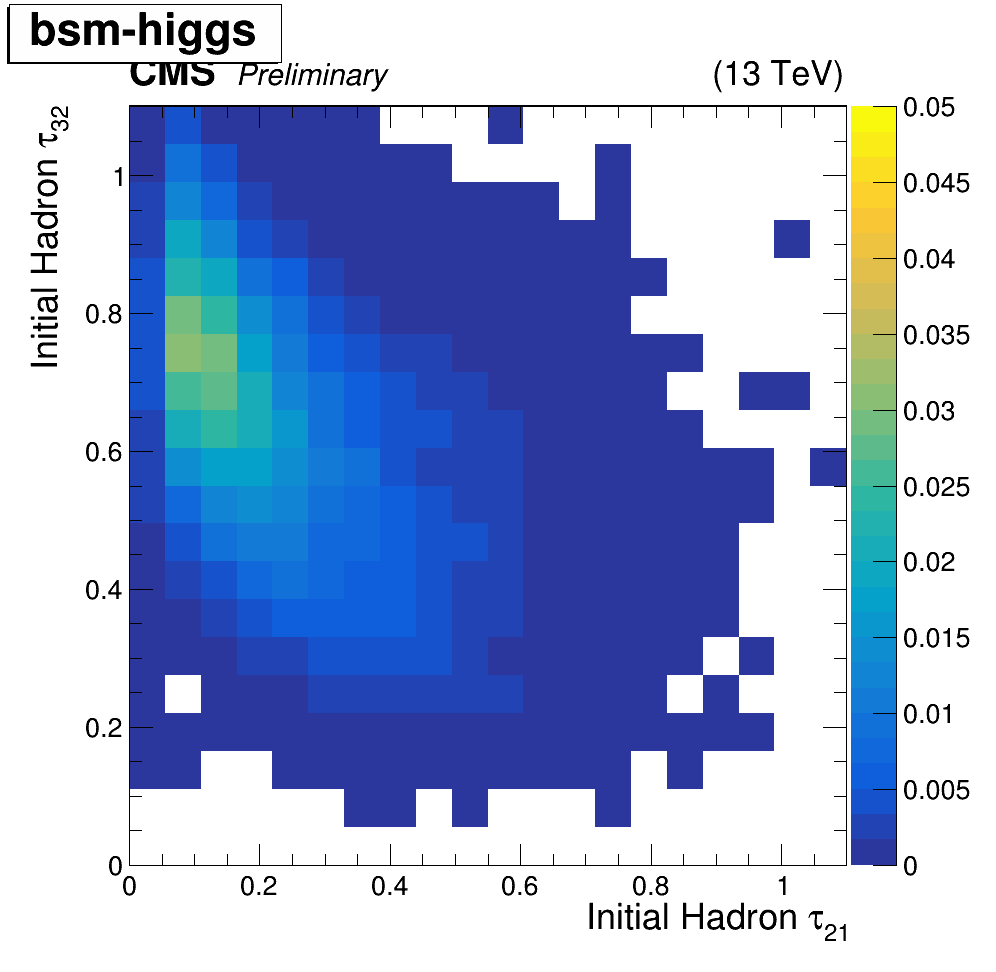

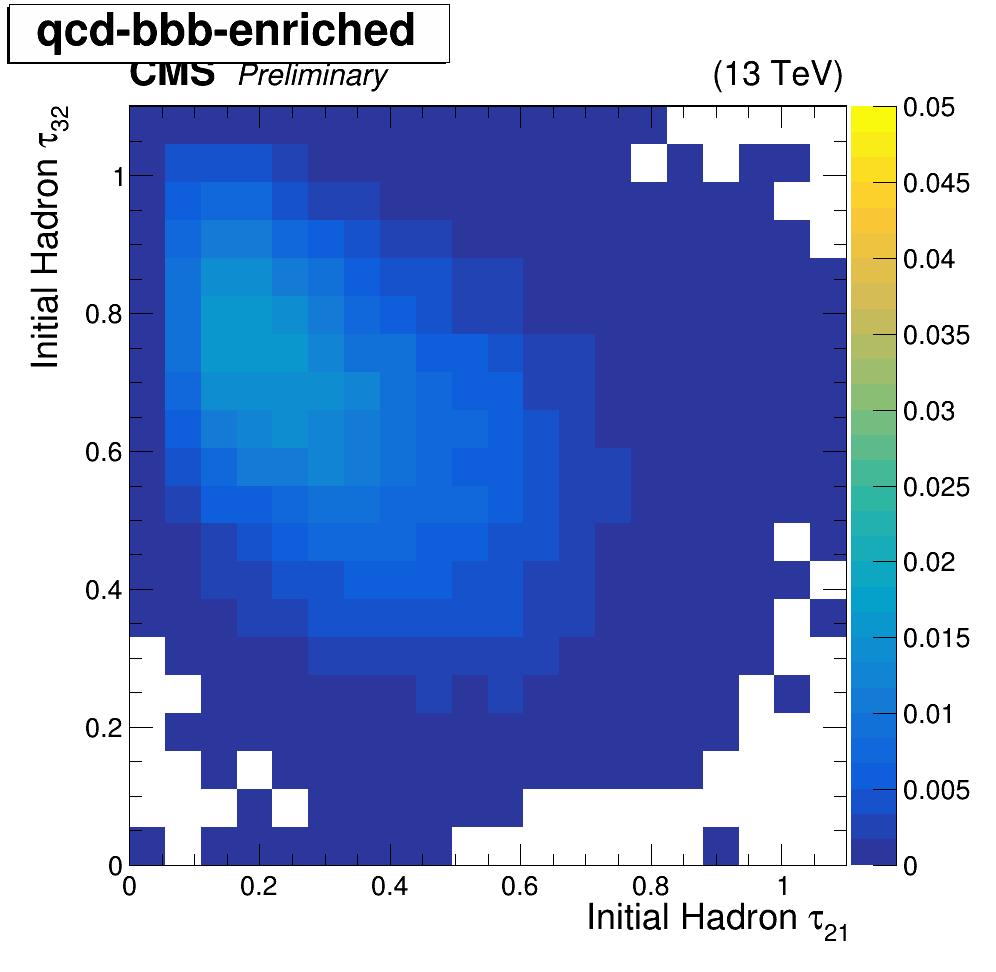

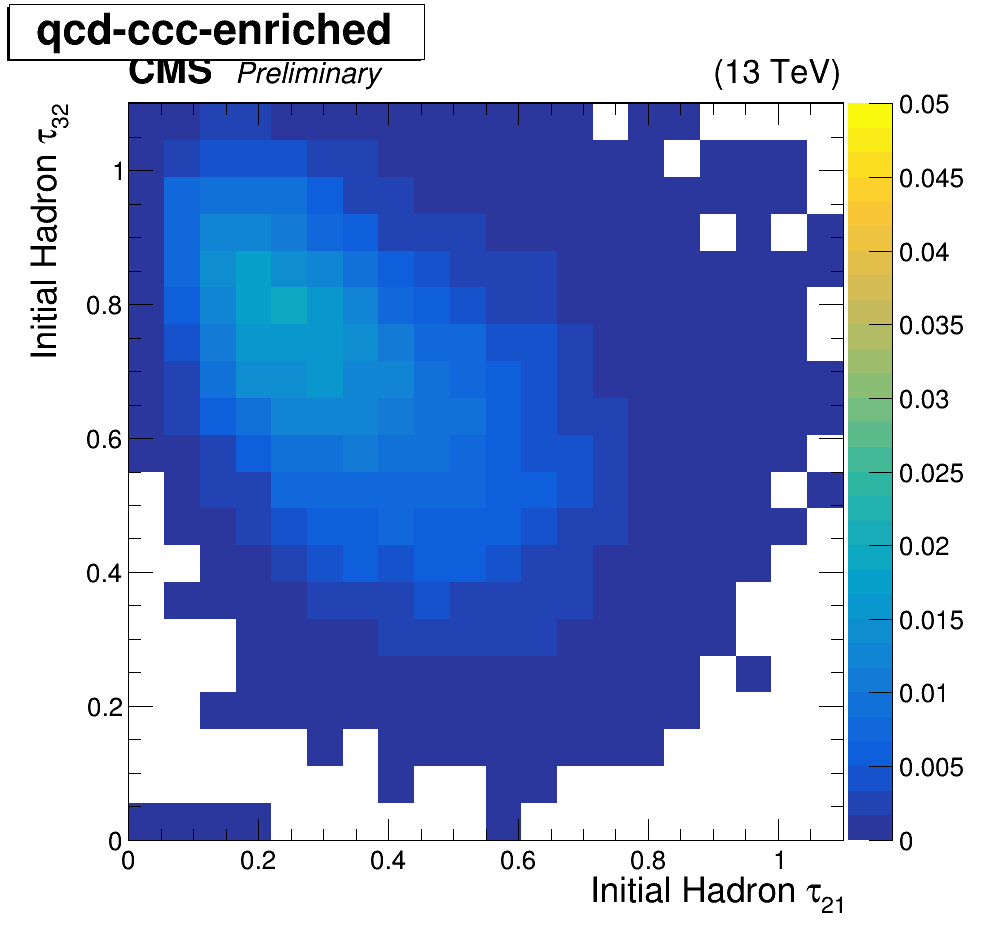

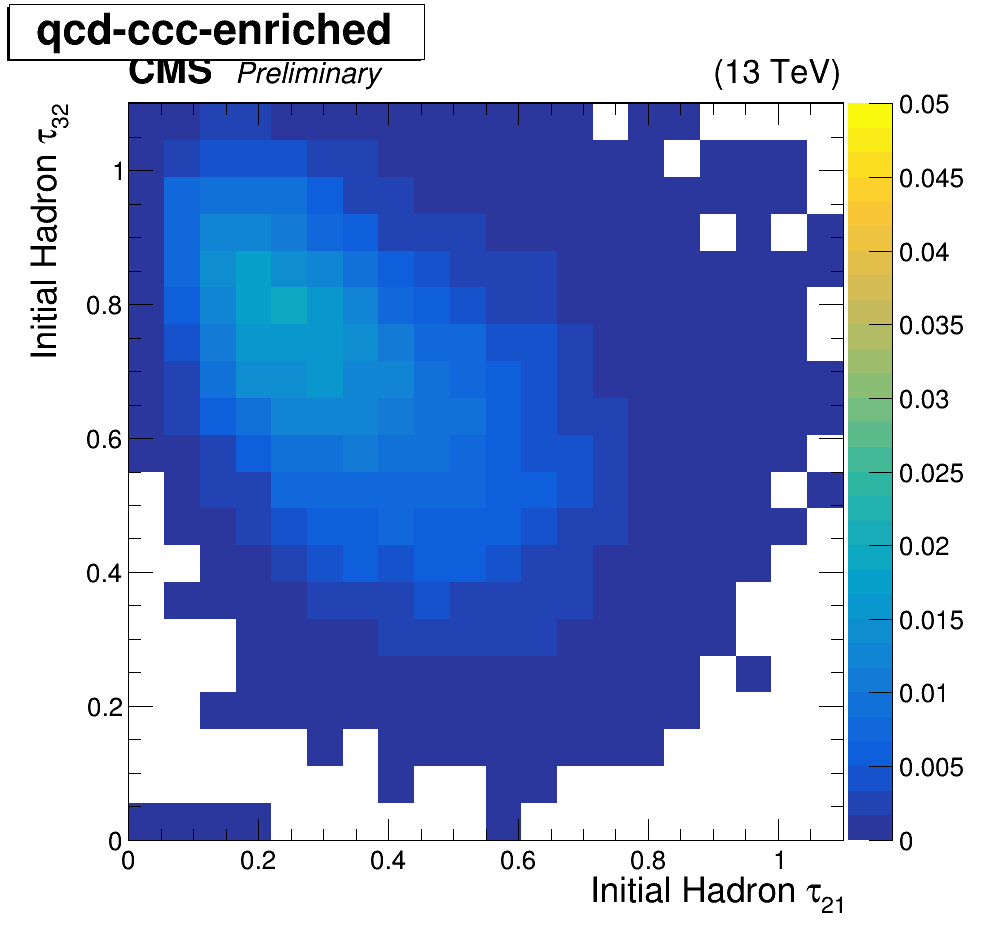

In [91]:
# print(hists)
hists = deepcopy(hists_ini)

for hist in hists:
    c1 = ROOT.TCanvas("","",1000,1000)
    c1.Draw()
    filename = hist.split('/')[len(hist.split('/'))-1].rstrip('_tree.root')
    hists[hist]['hist'].Scale(1./hists[hist]['hist'].Integral())
    hists[hist]['hist'].SetMarkerStyle(0)
    hists[hist]['hist'].SetLineWidth(2)
    hists[hist]['hist'].SetYTitle(f'Initial Hadron #tau_{{32}}')
    hists[hist]['hist'].SetXTitle(f'Initial Hadron #tau_{{21}}')
#     hists[hist]['hist'].SetYTitle(f'gen-parton #Sigmap_{{T}}({flavor1})/#Sigmap_{{T}}({flavor1},p)')
#     hists[hist]['hist'].SetXTitle(f'gen-parton #Sigmap_{{T}}({flavor2})/#Sigmap_{{T}}({flavor2},p)')
    hists[hist]['hist'].SetTitle(f'{filename}')
    hists[hist]['hist'].SetMaximum(0.05)
    hists[hist]['hist'].SetContour(30)
    ROOT.gStyle.SetOptTitle(True)
    hists[hist]['hist'].Draw("COLZ")
    
    CMS_lumi(c1,0,0)
    ROOT.gStyle.SetPadRightMargin(0.15)
#     c1.SaveAs(f'/eos/user/s/sdeng/www/220512_jet_gp_test/ptratio_2d/{filename}_{flavor1}{flavor2}_ptratio_2+j_2d.png')
    c1.SaveAs(f'/eos/user/s/sdeng/www/221027_jet_had_test/{filename}_tau32_21.png')
# arrays[['fj1_ptg_ptgq','fj2_ptg_ptgq']]

In [ ]:
# file = "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/zhcc_tree.root"

def AddHist_2d_pnet(file, hist, variable1, pnet):
    sumpt_branches = uproot.open(file+':Events').keys(filter_name='fj_1*sumpt*')
    npart_branches = uproot.open(file+':Events').keys(filter_name='fj_1*part*')
    qualified_branches = uproot.open(file+':Events').keys(filter_name='fj_1*qualified*')
    pnet_branches = uproot.open(file+':Events').keys(filter_name='fj_1_ParticleNetMD*')
    gen_branches = ['xsecWeight']
    branches = []
    branches.extend(sumpt_branches)
    branches.extend(gen_branches)
    branches = set(sumpt_branches + gen_branches + npart_branches + qualified_branches + pnet_branches)
    arrays = uproot.open(file+':Events').arrays(branches, library='pd')

    fj1_qual_cut = arrays.loc[:,'fj_1_is_qualified'] == True
    npart_cut = (arrays.loc[:,'fj_1_npart'] <= 2) & (arrays.loc[:,'fj_1_npart'] > 0)
#     npart_cut = (arrays.loc[:,'fj_1_npart'] > 2)
#     fj2_qual_cut = arrays.loc[:,'fj_2_is_qualified'] == True

    # Select Only one fatjet events
#     arrays = arrays.loc[fj1_qual_cut ^ fj2_qual_cut, :]
    arrays = arrays.loc[fj1_qual_cut & npart_cut, :]

    var1 = 'ptratio_1'
    arrays[var1] = arrays[variable1]/arrays['fj_1_part_sumpt']
#     arrays['fj2_ptg_ptgq'] = arrays[variable]/arrays['fj_2_part_sumpt']

    # Fill fj2 to NaN fj1
#     arrays['fj1_ptg_ptgq'].fillna(arrays['fj2_ptg_ptgq'], inplace=True)
#     var2 = 'fj2_ptg_ptgq'
    
    for i in trange(0, len(arrays[var1]), desc=f'fill {var1} for {file}'):
        if (arrays[var1].values[i]) or (arrays[var1].values[i] == 0):
#             hist.Fill(float(arrays[var1].values[i]), float(arrays['xsecWeight'].values[i]))
            hist.Fill(float(arrays[pnet].values[i]), float(arrays[var1].values[i]))
            
#     for i in trange(0, len(arrays[var2]), desc=f'fill {var2} for {file}'):
#         if arrays[var2].values[i]:
#             hist.Fill(float(arrays[var2].values[i]), float(arrays['xsecWeight'].values[i]))

files = [
    '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/qcd-mg_tree.root',
    '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/zhcc_tree.root',
    '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/zhbb_tree.root',
#     '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/test.root',
#     "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/zhcc_tree.root",
#     "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/zhbb_tree.root",
#     "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/qcd-mg_tree.root",
]

hists_ini = {}
flavor1 = 'b'
variable1 = f'fj_1_{flavor1}part_sumpt'
pnet = 'fj_1_ParticleNetMD_XccVsQCD'
# pnet = 'fj_1_ParticleNetMD_XccVsQCD'
for file in files:
    hists_ini[file] = {}
    hists_ini[file]['hist'] = ROOT.TH2D("","", 20, 0, 1.1, 20, 0, 1.1)
    AddHist_2d_pnet(file, hists_ini[file]['hist'], variable1, pnet)

In [ ]:
# print(hists)
hists = deepcopy(hists_ini)

for hist in hists:
    c1 = ROOT.TCanvas("","",1000,1000)
    c1.Draw()
    filename = hist.split('/')[len(hist.split('/'))-1].rstrip('_tree.root')
    hists[hist]['hist'].Scale(1./hists[hist]['hist'].Integral())
    hists[hist]['hist'].SetMarkerStyle(0)
    hists[hist]['hist'].SetLineWidth(2)
    hists[hist]['hist'].SetYTitle(f'gen-parton #Sigmap_{{T}}({flavor1})/#Sigmap_{{T}}({flavor1},p)')
    hists[hist]['hist'].SetXTitle(f'Score {pnet.lstrip("fj_1_")}')
    hists[hist]['hist'].SetTitle(f'{filename}')
    hists[hist]['hist'].SetMaximum(0.2)
    hists[hist]['hist'].SetContour(20)
    ROOT.gStyle.SetOptTitle(True)
    hists[hist]['hist'].Draw("COLZ")
    
    CMS_lumi(c1,0,0)
    ROOT.gStyle.SetPadRightMargin(0.15)
    c1.SaveAs(f'/eos/user/s/sdeng/www/220512_jet_gp_test/ptratio_pnet_2d/{filename}_{flavor1}ptratio_{pnet.lstrip("fj_1_")}_012j_2d.png')
# arrays[['fj1_ptg_ptgq','fj2_ptg_ptgq']]

## eta-phi 2d average check 

In [ ]:
# file = '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/qcd-mg_tree.root'
file = '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/zhbb_tree.root'
# file = '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/zhcc_tree.root'

f = ROOT.TFile(file,'READ')
h_2d = f.Get('h_gp_cpart_2d')

c1 = ROOT.TCanvas("","",1000,1000)
c1.Draw()
h_2d.Draw('COLZ')
h_2d.SetXTitle("#eta")
h_2d.SetYTitle("#phi")
h_2d.SetContour(30)
h_2d.Scale(1./h_2d.Integral())
ROOT.gStyle.SetPalette(1)
CMS_lumi(c1, 0, 0)

## eta-phi 2d single check

In [ ]:
def plothist_singlecheck(file, **kawrgs):
    
    branches = {
        'lp_branches' : {
            'branch_name':['fj_1_lp_pt','fj_1_lp_eta','fj_1_lp_phi'],
            'color':'black',
            'alpha':0.2,
            'marker':'o'
        },
        'bp_branches' : {
            'branch_name':['fj_1_bp_pt','fj_1_bp_eta','fj_1_bp_phi'],
            'color':'yellow',
            'alpha':0.5,
            'marker':'o'
        },
        'cp_branches' : {
            'branch_name':['fj_1_cp_pt','fj_1_cp_eta','fj_1_cp_phi'],
            'color':'red',
            'alpha':0.5,
            'marker':'o'
        },
        'gp_branches' : {
            'branch_name':['fj_1_gp_pt','fj_1_gp_eta','fj_1_gp_phi'],
            'color':'blue',
            'alpha':0.5,
            'marker':'o'
        }
    }

    arrays_npart = uproot.open(file+':Events').arrays(['fj_1_npart', 'fj_1_is_qualified'], library='pd')
    njet_cut = 0
    npart_cut = (arrays_npart.loc[:,'fj_1_npart'] <= 2) & (arrays_npart.loc[:,'fj_1_npart'] > njet_cut) & (arrays_npart.loc[:,'fj_1_is_qualified'] == True)
#     npart_cut = (arrays_npart.loc[:,'fj_1_npart'] >= 0) & (arrays_npart.loc[:,'fj_1_is_qualified'] == True)
    arrays_npart = arrays_npart.loc[npart_cut,:].index.get_level_values(0)
    
    path = '/eos/user/s/sdeng/www/220511_jet_gp_test/'
    name = file.split('/')[len(file.split('/'))-1].rstrip('_tree.root')
    plt.style.use(hep.style.CMS)
    branches_sum = uproot.open(file+':Events').keys(filter_name='fj_1_*p_pt')
    branches_sum.extend(uproot.open(file+':Events').keys(filter_name='fj_1_*p_eta'))
    branches_sum.extend(uproot.open(file+':Events').keys(filter_name='fj_1_*p_phi'))
    branches_sum.append('fj_1_is_qualified')
    arrays_sum = uproot.open(file+':Events').arrays(branches_sum, library='pd')
    
    branches_netscore = uproot.open(file+':Events').keys(filter_name='fj_1_ParticleNetMD*')
    branches_sumpt = uproot.open(file+':Events').keys(filter_name='fj_1_*sumpt*')
    arrays_score = uproot.open(file+':Events').arrays(set(branches_netscore + branches_sumpt), library='pd')
    arrays_score['fj_1_gp_ptratio'] = arrays_score['fj_1_gpart_sumpt']/arrays_score['fj_1_part_sumpt']
    arrays_score['fj_1_cp_ptratio'] = arrays_score['fj_1_cpart_sumpt']/arrays_score['fj_1_part_sumpt']
    arrays_score['fj_1_bp_ptratio'] = arrays_score['fj_1_bpart_sumpt']/arrays_score['fj_1_part_sumpt']
    
    from tqdm import tqdm
    for entry in tqdm(arrays_npart.tolist()[:100]):
        scatter = []
        is_empty = True
#         fig = plt.figure(figsize=(10,10))
        fig, ax = plt.subplots(figsize=(10,10))
        for branch in branches:
            branch_name = branches[branch]['branch_name']
            color = branches[branch]['color']
            alpha = branches[branch]['alpha']
            marker = branches[branch]['marker']
    #         print(branches[branch])
            for arrays_temp in arrays_sum:
                arrays = arrays_temp.copy()
                is_qualified = arrays.loc[:,'fj_1_is_qualified'] == True
                arrays = arrays.loc[is_qualified,:]
                if (branch_name[0] in arrays.columns): 
    #                 print(branch_name[0])
                    if (entry in arrays.index.get_level_values(0)):
                        arrays = arrays.xs(entry)
                        is_empty = False
                        scatter = ax.scatter(arrays[branch_name[1]], arrays[branch_name[2]], 10 * arrays[branch_name[0]], c=color, alpha=alpha, marker=marker, label=branch)
                        break
                    else:
                        break
                else:
                    continue

        # arrays.xs(0)
        if is_empty:
            continue
        else:
            exam = []
            exam_name = []
            for branch in branches:
                branch_name = branches[branch]['branch_name']
                color = branches[branch]['color']
                alpha = branches[branch]['alpha']
                marker = branches[branch]['marker']
                exam.append(ax.scatter(-999, -999, 80, c=color, alpha=alpha, marker=marker))
                exam_name.append(branch.rstrip('_branches'))
            ax.add_artist(ax.legend(handles = exam, labels = exam_name, loc='upper left'))
            plt.title('fj1 Entry {entry}'.format(entry=entry))
            plt.xlabel('$\eta$')
            plt.ylabel('$\phi$')
            plt.xlim([-2.5, 2.5])
            plt.ylim([-3, 3])
            x = 1.0 
            y = -2.8
            for i in ['fj_1_gp_ptratio', 'fj_1_cp_ptratio', 'fj_1_bp_ptratio']:
                plt.text(x, y, '{name}:'.format(name=i.lstrip('fj_1_')) + '{:.2f}'.format(arrays_score.iloc[entry][i]), fontsize=20)
                y += 0.4
            x = -0.5 
            y = 2.6
            for i in ['fj_1_ParticleNetMD_XbbVsQCD', 'fj_1_ParticleNetMD_XccVsQCD', ]:
                plt.text(x, y, '{name}:'.format(name=i.lstrip('fj_1_')) + '{:.2f}'.format(arrays_score.iloc[entry][i]), fontsize=20)
                y -= 0.4
            if os.path.exists(path+'{name}_{njet}j'.format(name=name, njet=njet_cut)):
                pass
            else:
                os.makedirs(path+'{name}_{njet}j'.format(name=name, njet=njet_cut))
            plt.savefig(path + '{name}_{njet}j/{name}_{entry}.png'.format(entry=entry, name=name, njet=njet_cut),bbox_inches='tight')
            continue
    #     plt.show()
    
files = [
    '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/qcd-mg_tree.root',
    '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/zhcc_tree.root',
    '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/zhbb_tree.root',
#     '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/test_tree.root',
#     "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/zhcc_tree.root",
#     "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/zhbb_tree.root",
#     "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/qcd-mg_tree.root",
]

for file in files:
    plothist_singlecheck(file)

    

## BDT - pnet 2d check

In [122]:
cuts = {
    'cut1':{
        'name': 'design_1',
        'sigexpr': 'fj_1_gpart_ptratio < 0.10',
        'bkgexpr': 'fj_1_gpart_ptratio > 0.75'
    },
    'cut2':{
        'name': 'design_2',
        'sigexpr': '(fj_1_npart <= 2 & (fj_1_bpart_ptratio > 0.90 | fj_1_cpart_ptratio > 0.90)) | (fj_1_npart > 2 & (fj_1_bpart_ptratio > 0.70 | fj_1_cpart_ptratio > 0.70))',
        'bkgexpr': '(fj_1_npart <= 2 & (fj_1_bpart_ptratio < 0.30 & fj_1_cpart_ptratio < 0.30)) | (fj_1_npart > 2 & (fj_1_bpart_ptratio < 0.20 & fj_1_cpart_ptratio < 0.20))'
    },
    'cut3':{
        'name': 'design_3',
        'sigexpr': '(fj_1_nbpart == 2 & fj_1_bpart_ptratio > 0.80) | (fj_1_ncpart == 2 & fj_1_cpart_ptratio > 0.80)',
        'bkgexpr': 'fj_1_nbpart != 2 & fj_1_ncpart != 2 & fj_1_gpart_ptratio > 0.75'
    }
}

var = 'fj_1_ParticleNetMD_XccVsQCD'
bdt_name = 'fj1_sfBDT'
xbins, xleft, xright = 20, 0, 1
ybins, yleft, yright = 20, 0, 1
eff = 0.9

def PlotPNet(file, var, bdt_name, eff, xbins, xleft, xright):
    x = 1
#     basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_nbhadrons>0 & fj_{x}_is_qualified'
    basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_nchadrons>0 & fj_{x}_nbhadrons==0 & fj_{x}_is_qualified'
    branches = uproot.open(file+':Events').keys(filter_name='*')
    df = uproot.open(file+':Events').arrays(branches, library='pd')
    df.query(basesel, inplace=True)
    
    hist = ROOT.TH2D("", "", xbins, xleft, xright, ybins, yleft, yright)
    for i in trange(0, len(df[var]), desc=f'fill {var} for {file}'):
        hist.Fill(float(df[var].values[i]), float(df[bdt_name].values[i]), float(df['xsecWeight'].values[i]))
    hist.Scale(1./hist.Integral())
    return hist


for cut in cuts:
    file = f'/eos/user/s/sdeng/sfbdt/20220519_results/{cuts[cut]["name"]}_fj_1sfBDT/mc/qcd-mg_tree.root'
    cuts[cut]['hist'] = PlotPNet(file, var, bdt_name, eff, bins, xleft, xright)

    

fill fj_1_ParticleNetMD_XccVsQCD for /eos/user/s/sdeng/sfbdt/20220519_results/design_1_fj_1sfBDT/mc/qcd-mg_tree.root: 100%|██████████| 14304/14304 [00:00<00:00, 71711.99it/s]
fill fj_1_ParticleNetMD_XccVsQCD for /eos/user/s/sdeng/sfbdt/20220519_results/design_2_fj_1sfBDT/mc/qcd-mg_tree.root: 100%|██████████| 14304/14304 [00:00<00:00, 71337.99it/s]
fill fj_1_ParticleNetMD_XccVsQCD for /eos/user/s/sdeng/sfbdt/20220519_results/design_3_fj_1sfBDT/mc/qcd-mg_tree.root: 100%|██████████| 14304/14304 [00:00<00:00, 71881.51it/s]


2017 (13 TeV)
2017 (13 TeV)
2017 (13 TeV)


Info in <TCanvas::Print>: png file /eos/user/s/sdeng/www/220519_jet_gp_test/design_1_bdt_fj_1_ParticleNetMD_XccVsQCD_2d.png has been created
Info in <TCanvas::Print>: png file /eos/user/s/sdeng/www/220519_jet_gp_test/design_2_bdt_fj_1_ParticleNetMD_XccVsQCD_2d.png has been created
Info in <TCanvas::Print>: png file /eos/user/s/sdeng/www/220519_jet_gp_test/design_3_bdt_fj_1_ParticleNetMD_XccVsQCD_2d.png has been created


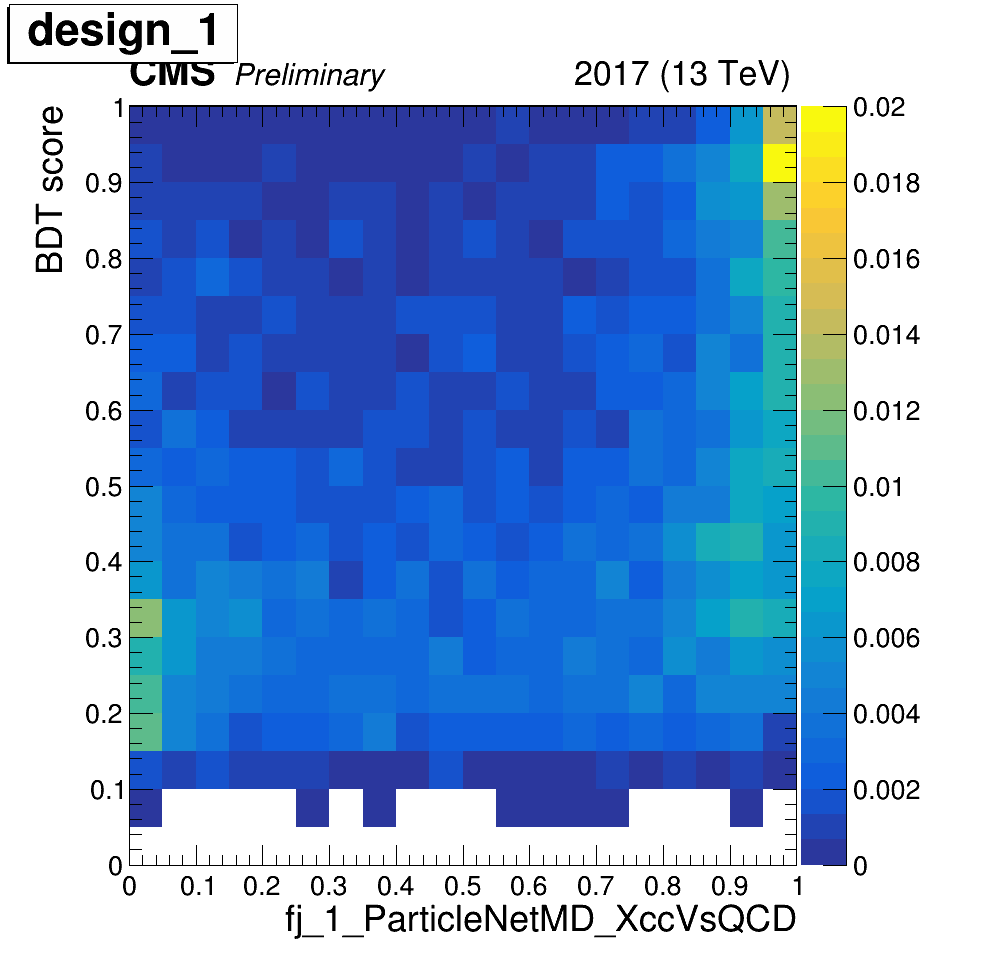

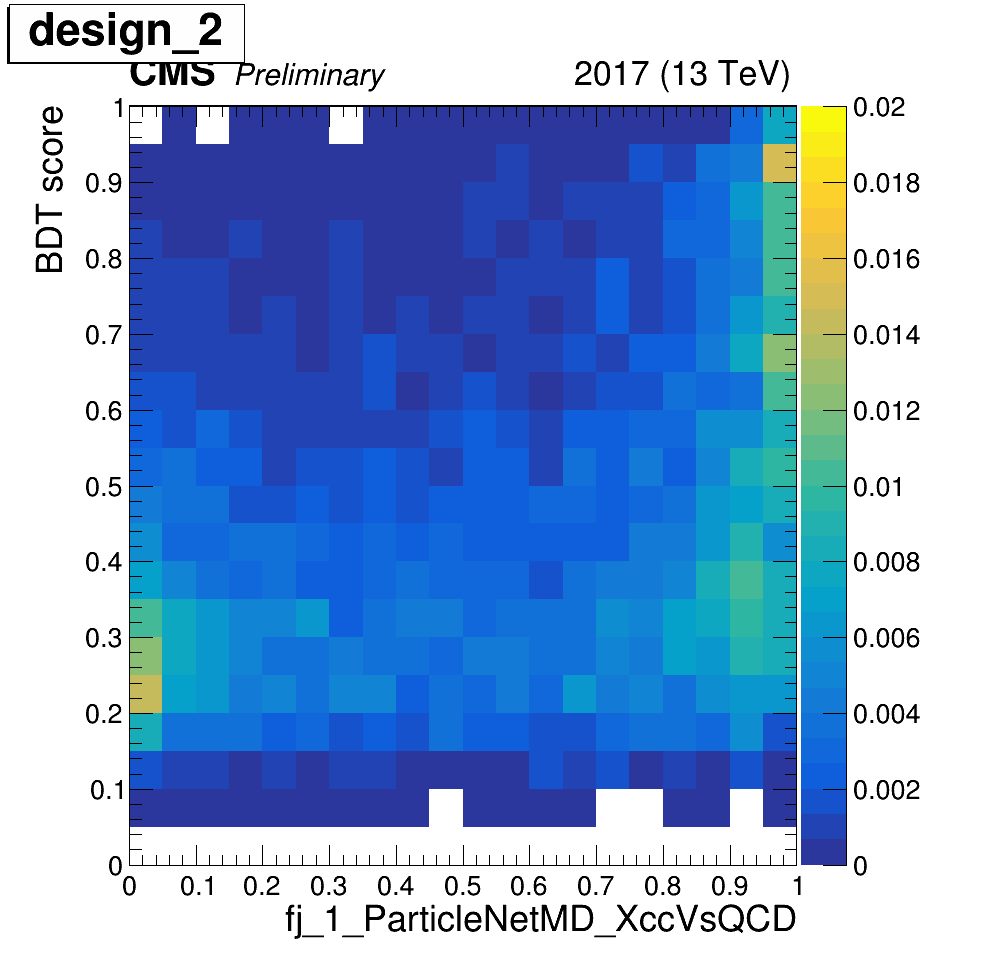

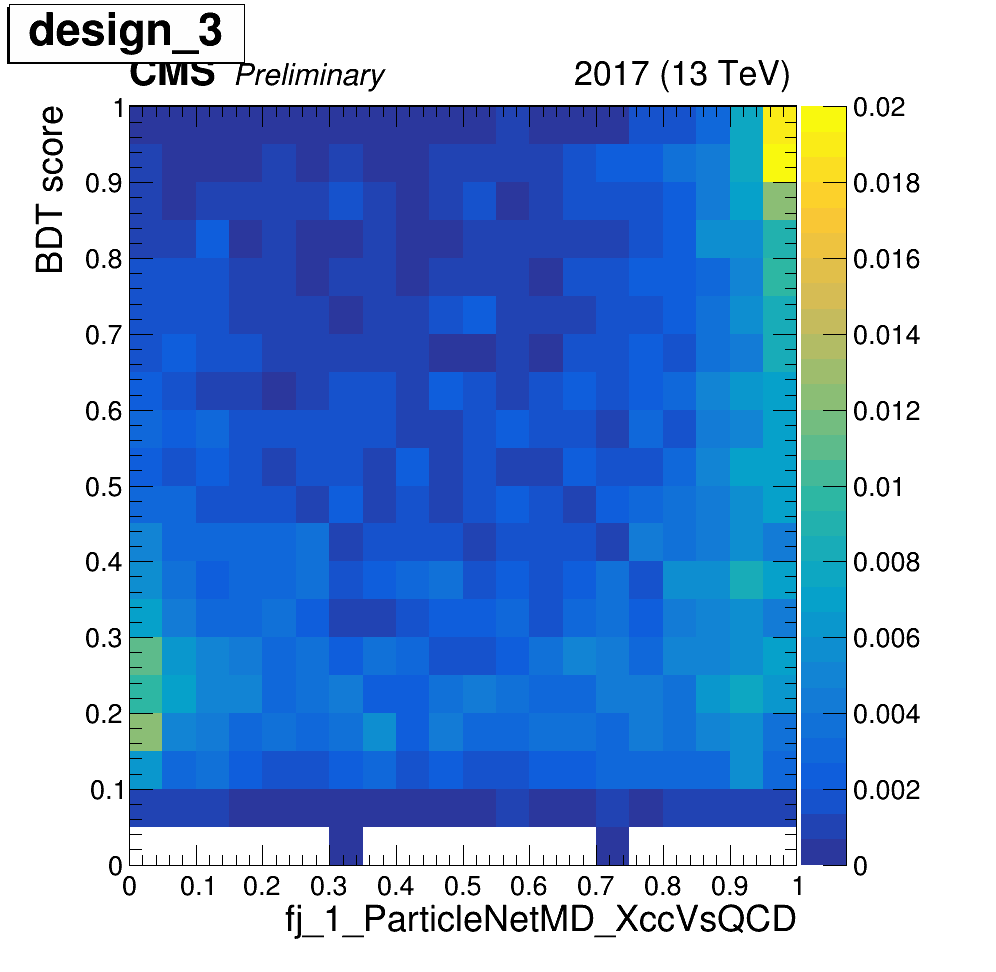

In [124]:
# print(hists)
hists = deepcopy(cuts)

for hist in hists:
    c1 = ROOT.TCanvas("","",1000,1000)
    c1.Draw()
    hists[hist]['hist'].SetMarkerStyle(0)
    hists[hist]['hist'].SetLineWidth(2)
    hists[hist]['hist'].SetYTitle(f'BDT score')
    hists[hist]['hist'].SetXTitle(f'{var}')
    hists[hist]['hist'].SetTitle(f'{hists[hist]["name"]}')
    hists[hist]['hist'].SetMaximum(0.02)
    hists[hist]['hist'].SetContour(30)
    ROOT.gStyle.SetOptTitle(True)
    hists[hist]['hist'].Draw("COLZ")
    
    CMS_lumi(c1,0,0)
    ROOT.gStyle.SetPadRightMargin(0.20)
    c1.SaveAs(f'/eos/user/s/sdeng/www/220519_jet_gp_test/{hists[hist]["name"]}_bdt_{var}_2d.png')
# ROOT.gPad.SetLogy()

## BDT - certain eff pnet 1d check

In [19]:
cuts = {
    'cut1':{
        'name': 'old_design',
        'sigexpr': 'fj_1_gpart_ptratio < 0.10',
        'bkgexpr': 'fj_1_gpart_ptratio > 0.75'
    },
    'cut2':{
        'name': 'new_design',
        'sigexpr' : '(fj_1_matchedInitHadsTau3/fj_1_matchedInitHadsTau1)<0.2',
        'bkgexpr' : '(fj_1_matchedInitHadsTau3/fj_1_matchedInitHadsTau1)>0.2'
    }
}

var = 'fj_1_ParticleNetMD_XbbVsQCD'
bdt_name = 'fj1_sfBDTnew'
bins, xleft, xright = 20, 0, 1
eff = 0.9


def wp_eval(df, bdt_name, eff, xbins, xleft, xright):
    
    hist = ROOT.TH1D("", "", bins, xleft, xright)
    
    for i in trange(0, len(df[bdt_name]), desc=f'fill {bdt_name} for {file}'):
#         hist.Fill(float(df[bdt_name].values[i]), float(df['xsecWeight'].values[i]))
        hist.Fill(float(df[bdt_name].values[i]))
    hist.Scale(1./hist.Integral())
    
    effs = []
    x = []
    for bin in range(1,bins+1):
        effs.append(hist.Integral(1, bin)/hist.Integral())
        x.append(hist.GetXaxis().GetBinCenter(bin))
        
    g_eff = ROOT.TGraph(bins, array('d',effs), array('d',x))
    return(g_eff, g_eff.Eval(eff))
    
def PlotPNet(file, var, bdt_name, eff, xbins, xleft, xright):
    x = 1
    basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_nbhadrons>0 & fj_{x}_is_qualified'
#     basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_nchadrons>0 & fj_{x}_nbhadrons==0 & fj_{x}_is_qualified'
    branches = uproot.open(file+':Events').keys(filter_name='*')
    df = uproot.open(file+':Events').arrays(branches, library='pd')
    df.query(basesel, inplace=True)
    g_eff, wp = wp_eval(df, bdt_name, eff, bins, xleft, xright)
    print(wp)
    hist = ROOT.TH1D("", "", bins, xleft, xright)

    bdt_cut = df.loc[:,bdt_name] > wp
    df = df.loc[bdt_cut,:]
    
    for i in trange(0, len(df[var]), desc=f'fill {var} for {file}'):
#         hist.Fill(float(df[var].values[i]), float(df['xsecWeight'].values[i]))
        hist.Fill(float(df[var].values[i]))
    hist.Scale(1./hist.Integral())
    return hist


for cut in cuts:
#     file = f'/eos/user/s/sdeng/sfbdt/20220519_results/{cuts[cut]["name"]}_fj_1sfBDT/mc/qcd-mg_tree.root'
    file = f'/home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/{cuts[cut]["name"]}/mc/qcd-mg_tree.root'
    for eff in [0.5, 0.7, 0.9]:
        cuts[cut][f'hist_{str(eff)}'] = PlotPNet(file, var, bdt_name, eff, bins, xleft, xright)

    

fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 13159/13159 [00:00<00:00, 225769.93it/s]


0.4459325396825396


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 6972/6972 [00:00<00:00, 114584.64it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 13159/13159 [00:00<00:00, 233771.91it/s]


0.6557943143812709


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 4249/4249 [00:00<00:00, 227481.69it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 13159/13159 [00:00<00:00, 229712.72it/s]


0.8785814771395077


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 1687/1687 [00:00<00:00, 222691.22it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 13159/13159 [00:00<00:00, 224086.07it/s]


0.4603494623655913


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 6850/6850 [00:00<00:00, 200358.32it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 13159/13159 [00:00<00:00, 231375.80it/s]


0.7017936802973976


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 4207/4207 [00:00<00:00, 228496.80it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 13159/13159 [00:00<00:00, 222958.16it/s]


0.910205


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 1858/1858 [00:00<00:00, 218475.38it/s]


{'cut1': {'name': 'old_design', 'sigexpr': 'fj_1_gpart_ptratio < 0.10', 'bkgexpr': 'fj_1_gpart_ptratio > 0.75', 'hist_0.5': <cppyy.gbl.TH1D object at 0x563001e89090>, 'hist_0.7': <cppyy.gbl.TH1D object at 0x563001eb5010>, 'hist_0.9': <cppyy.gbl.TH1D object at 0x563001eb5580>}, 'cut2': {'name': 'new_design', 'sigexpr': '(fj_1_matchedInitHadsTau3/fj_1_matchedInitHadsTau1)<0.2', 'bkgexpr': '(fj_1_matchedInitHadsTau3/fj_1_matchedInitHadsTau1)>0.2', 'hist_0.5': <cppyy.gbl.TH1D object at 0x563001eb5af0>, 'hist_0.7': <cppyy.gbl.TH1D object at 0x563001eb60a0>, 'hist_0.9': <cppyy.gbl.TH1D object at 0x563001eb6650>}}
(13 TeV)


Info in <TCanvas::Print>: png file ./plots/20221027/bdt_cut_fj_1_ParticleNetMD_XbbVsQCD.png has been created


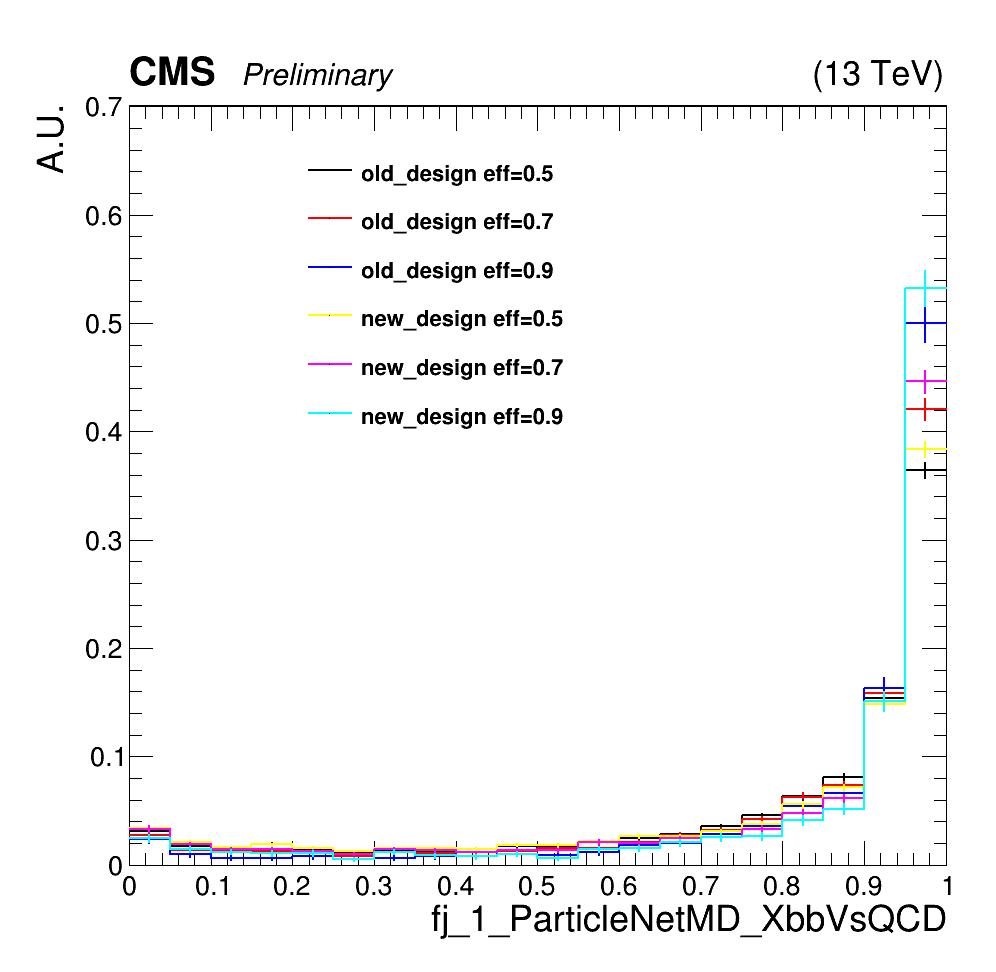

In [23]:
print(hists)
hists = deepcopy(cuts)
c1 = ROOT.TCanvas("","",1000,1000)
c1.Draw()

legend = ROOT.TLegend(0.30, 0.55, 0.55, 0.85)
# legend.SetNColumns(3)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.025)
legend.SetLineWidth(1)
legend.SetLineStyle(0)

def SetStyle(hist, color, linestyle):
    hist.SetMarkerStyle(0)
    hist.SetLineColor(color)
    hist.SetLineWidth(2)
    hist.SetLineStyle(linestyle)
    hist.SetXTitle(f'{var}')
    hist.SetYTitle('A.U.')

color = 1
for hist in hists:
    for eff in [0.5, 0.7, 0.9]:
        legend.AddEntry(hists[hist][f'hist_{str(eff)}'], f'{hists[hist]["name"]} eff={str(eff)}')
        hists[hist][f'hist_{str(eff)}'].Scale(1./hists[hist][f'hist_{str(eff)}'].Integral())
        SetStyle(hists[hist][f'hist_{str(eff)}'], color, 1)
        if color == 1:
            hists[hist][f'hist_{str(eff)}'].Draw("HIST e")
            hists[hist][f'hist_{str(eff)}'].SetMaximum(0.7)
        else:
            hists[hist][f'hist_{str(eff)}'].Draw("HIST e SAME")
        color += 1
        if color in [3,10] : color += 1
legend.Draw("SAME")
    
CMS_lumi(c1,0,0)
ROOT.gStyle.SetPadRightMargin(0.05)
# c1.SaveAs(f'/eos/user/s/sdeng/www/220519_jet_gp_test/bdt_cut_{var}.png')
c1.SaveAs(f'./plots/20221027/bdt_cut_{var}.png')
# ROOT.gPad.SetLogy()

## BDT - shape eff pnet 1d check

In [9]:
cuts = {
    'cut1':{
        'name': 'old_design',
        'sigexpr': 'fj_1_gpart_ptratio < 0.10',
        'bkgexpr': 'fj_1_gpart_ptratio > 0.75'
    },
    'cut2':{
        'name': 'new_design',
        'sigexpr' : '(fj_1_matchedInitHadsTau3/fj_1_matchedInitHadsTau1)<0.2',
        'bkgexpr' : '(fj_1_matchedInitHadsTau3/fj_1_matchedInitHadsTau1)>0.2'
    }
}

var = 'fj_1_ParticleNetMD_XbbVsQCD'
bdt_name = 'fj1_sfBDTnew'
bins, xleft, xright = 20, 0, 1.2
eff = 0.9


def wp_eval(df, bdt_name, eff, xbins, xleft, xright):
    
    hist = ROOT.TH1D("", "", bins, xleft, xright)
    
    for i in trange(0, len(df[bdt_name]), desc=f'fill {bdt_name} for {file}'):
#         hist.Fill(float(df[bdt_name].values[i]), float(df['xsecWeight'].values[i]))
        hist.Fill(float(df[bdt_name].values[i]))
    hist.Scale(1./hist.Integral())
    
    effs = []
    x = []
    for bin in range(1,bins+1):
        effs.append(hist.Integral(1, bin)/hist.Integral())
        x.append(hist.GetXaxis().GetBinCenter(bin))
        
    g_eff = ROOT.TGraph(bins, array('d',effs), array('d',x))
    return(g_eff, g_eff.Eval(eff))
    
def PlotPNet(file, var, bdt_name, eff, xbins, xleft, xright):
    x = 1
    basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_nbhadrons>0 & fj_{x}_is_qualified'
#     basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_nchadrons>0 & fj_{x}_nbhadrons==0 & fj_{x}_is_qualified'
    branches = uproot.open(file+':Events').keys(filter_name='*')
    df = uproot.open(file+':Events').arrays(branches, library='pd')
    df.query(basesel, inplace=True)
    g_eff, wp = wp_eval(df, bdt_name, eff, bins, xleft, xright)
    print(wp)
    hist = ROOT.TH1D("", "", bins, xleft, xright)

    bdt_cut = df.loc[:,bdt_name] > wp
    df = df.loc[bdt_cut,:]
    
    for i in trange(0, len(df[var]), desc=f'fill {var} for {file}'):
#         hist.Fill(float(df[var].values[i]), float(df['xsecWeight'].values[i]))
        hist.Fill(float(df[var].values[i]))
    hist.Scale(1./hist.Integral())
    return hist


for cut in cuts:
#     file = f'/eos/user/s/sdeng/sfbdt/20220519_results/{cuts[cut]["name"]}_fj_1sfBDT/mc/qcd-mg_tree.root'
    file = f'/home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/{cuts[cut]["name"]}/mc/qcd-mg_tree.root'
    file_vhbb = f'/home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/{cuts[cut]["name"]}/mc/zhbb_tree.root'
    file_vhcc = f'/home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/{cuts[cut]["name"]}/mc/zhcc_tree.root'
    for eff in [0.5, 0.7, 0.9]:
        cuts[cut][f'hist_{str(eff)}'] = PlotPNet(file, var, bdt_name, eff, bins, xleft, xright)
        cuts[cut][f'vhbbhist_{str(eff)}'] = PlotPNet(file_vhbb, var, bdt_name, eff, bins, xleft, xright)
        cuts[cut][f'vhcchist_{str(eff)}'] = PlotPNet(file_vhcc, var, bdt_name, eff, bins, xleft, xright)

    

fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 13159/13159 [00:00<00:00, 222299.92it/s]


0.4412951807228915


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 7048/7048 [00:00<00:00, 218001.61it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 323/323 [00:00<00:00, 140637.41it/s]


0.6925


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/zhbb_tree.root: 100%|██████████| 166/166 [00:00<00:00, 135801.53it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 6/6 [00:00<00:00, 53773.13it/s]


0.33


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/zhcc_tree.root: 100%|██████████| 4/4 [00:00<00:00, 39475.80it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 13159/13159 [00:00<00:00, 245679.34it/s]


0.6518126801152737


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 4290/4290 [00:00<00:00, 235561.02it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 323/323 [00:00<00:00, 226814.03it/s]


0.8424615384615385


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/zhbb_tree.root: 100%|██████████| 118/118 [00:00<00:00, 191758.18it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 6/6 [00:00<00:00, 52211.25it/s]


0.4739999999999997


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/zhcc_tree.root: 100%|██████████| 2/2 [00:00<00:00, 21620.12it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 13159/13159 [00:00<00:00, 235567.87it/s]


0.8735557710960232


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 1745/1745 [00:00<00:00, 220672.97it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 323/323 [00:00<00:00, 228921.97it/s]


0.9174915254237288


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/zhbb_tree.root: 100%|██████████| 70/70 [00:00<00:00, 170006.53it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/qcd-mg_tree.root: 100%|██████████| 6/6 [00:00<00:00, 52980.68it/s]


0.858


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/old_design/mc/zhcc_tree.root: 100%|██████████| 1/1 [00:00<00:00, 13357.66it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 13159/13159 [00:00<00:00, 232594.64it/s]


0.45441860465116274


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 6914/6914 [00:00<00:00, 231275.61it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 323/323 [00:00<00:00, 199288.05it/s]


0.8496428571428571


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/zhbb_tree.root: 100%|██████████| 176/176 [00:00<00:00, 203753.11it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 6/6 [00:00<00:00, 57719.78it/s]


0.69


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/zhcc_tree.root: 100%|██████████| 3/3 [00:00<00:00, 32346.82it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 13159/13159 [00:00<00:00, 236444.84it/s]


0.6969363636363636


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 4265/4265 [00:00<00:00, 230304.95it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 323/323 [00:00<00:00, 225567.80it/s]


0.9103170731707316


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/zhbb_tree.root: 100%|██████████| 143/143 [00:00<00:00, 193043.28it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 6/6 [00:00<00:00, 62601.55it/s]


0.876


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/zhcc_tree.root: 100%|██████████| 2/2 [00:00<00:00, 26132.74it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 13159/13159 [00:00<00:00, 232631.89it/s]


0.902850699844479


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 1972/1972 [00:00<00:00, 233319.25it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 323/323 [00:00<00:00, 216519.13it/s]


0.9623142857142857


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/zhbb_tree.root: 100%|██████████| 57/57 [00:00<00:00, 157182.99it/s]
fill fj1_sfBDTnew for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/qcd-mg_tree.root: 100%|██████████| 6/6 [00:00<00:00, 61680.94it/s]


0.9119999999999999


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221027_fj_1sfBDT/new_design/mc/zhcc_tree.root: 100%|██████████| 2/2 [00:00<00:00, 16912.52it/s]


(13 TeV)


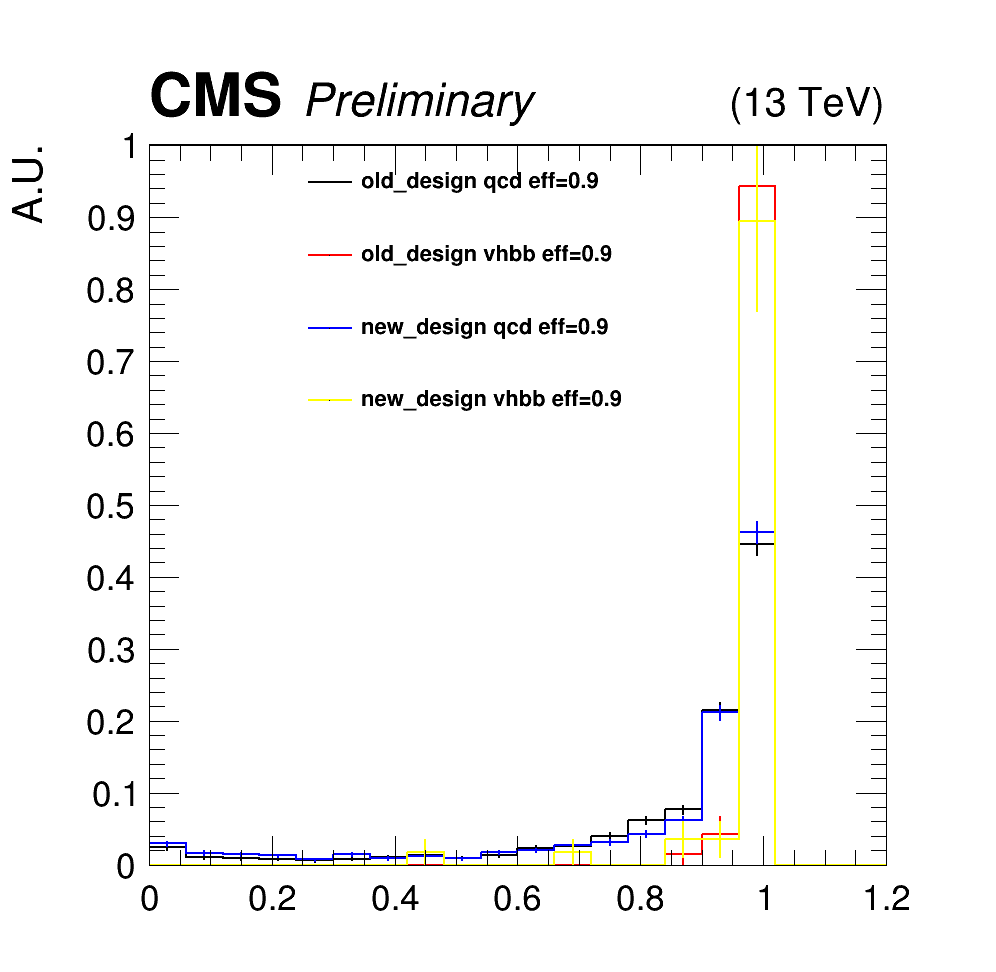

In [10]:
hists = deepcopy(cuts)
def SetStyle(hist, color, linestyle):
    hist.SetMarkerStyle(0)
    hist.SetLineColor(color)
    hist.SetLineWidth(2)
    hist.SetLineStyle(linestyle)
    hist.SetXTitle(f'{var}')
    hist.SetYTitle('A.U.')
        # Adjust y-axis settings
    # hist.GetYaxis().SetNdivisions(105)
    hist.GetYaxis().SetTitleSize(45)
    hist.GetYaxis().SetTitleFont(43)
    hist.GetYaxis().SetTitleOffset(1.65)
    hist.GetYaxis().SetLabelFont(43)
    hist.GetYaxis().SetLabelSize(38)
    hist.GetYaxis().SetLabelOffset(0.015)

    # Adjust x-axis settings
    hist.GetXaxis().SetTitleSize(45)
    hist.GetXaxis().SetTitleFont(43)
    hist.GetXaxis().SetTitleOffset(3.3)
    hist.GetXaxis().SetLabelFont(43)
    hist.GetXaxis().SetLabelSize(38)
    hist.GetXaxis().SetLabelOffset(0.015)

# for eff in [0.5, 0.7, 0.9]:
for eff in [0.9]:
    c1 = ROOT.TCanvas("","",1000,1000)

    c1.Draw()
#     pad1 = ROOT.TPad("pad1", "pad1", 0, 0.00, 1, 1.00)
#     pad1.SetTopMargin(0.1)  # joins upper and lower plot
#     pad1.SetBottomMargin(0.050)  # joins upper and lower plot
#     # pad1.SetGridx()
#     pad1.Draw()
    legend = ROOT.TLegend(0.30, 0.55, 0.55, 0.85)
    # legend.SetNColumns(3)
    legend.SetBorderSize(0)
    legend.SetFillColor(0)
    legend.SetTextSize(0.025)
    legend.SetLineWidth(1)
    legend.SetLineStyle(0)
    
#     # Lower ratio plot is pad2
#     c1.cd()  # returns to main canvas before defining pad2
#     pad2 = ROOT.TPad("pad2", "pad2", 0, 0.00, 1, 0.30)
#     pad2.SetTopMargin(0.040)  # joins upper and lower plot
#     pad2.SetBottomMargin(0.40)  # joins upper and lower plot
#     pad2.SetGridy()
# #     pad2.Draw()
#     legend2 = ROOT.TLegend(0.50, 0.75, 0.80, 0.85)
#     # legend2.SetNColumns(3)
#     legend2.SetBorderSize(0)
#     legend2.SetFillColor(0)
#     legend2.SetTextSize(0.025)
#     legend2.SetLineWidth(1)
#     legend2.SetLineStyle(0)
#     c1.cd()

    

    color = 1
    for hist in hists:
        legend.AddEntry(hists[hist][f'hist_{str(eff)}'], f'{hists[hist]["name"]} qcd eff={str(eff)}')
        legend.AddEntry(hists[hist][f'vhbbhist_{str(eff)}'], f'{hists[hist]["name"]} vhbb eff={str(eff)}')
#         legend.AddEntry(hists[hist][f'vhcchist_{str(eff)}'], f'{hists[hist]["name"]} vhcc eff={str(eff)}')
        hists[hist][f'hist_{str(eff)}'].Scale(1./hists[hist][f'hist_{str(eff)}'].Integral())
        hists[hist][f'vhbbhist_{str(eff)}'].Scale(1./hists[hist][f'vhbbhist_{str(eff)}'].Integral())
        hists[hist][f'vhcchist_{str(eff)}'].Scale(1./hists[hist][f'vhcchist_{str(eff)}'].Integral())
        SetStyle(hists[hist][f'hist_{str(eff)}'], color, 1)
        SetStyle(hists[hist][f'vhbbhist_{str(eff)}'], color+1, 1)
        SetStyle(hists[hist][f'vhcchist_{str(eff)}'], color+2, 1)
        
#         pad1.cd()
        if color == 1:
            hists[hist][f'hist_{str(eff)}'].Draw("HIST e")
            hists[hist][f'hist_{str(eff)}'].SetMaximum(1.0)
#             hists[hist][f'hist_{str(eff)}'].GetXaxis().SetLabelSize(0)
            hists[hist][f'hist_{str(eff)}'].SetXTitle('fj_1_ParticleNetMD_XbbVsQCD')
        else:
            hists[hist][f'hist_{str(eff)}'].Draw("HIST e SAME")
        hists[hist][f'vhbbhist_{str(eff)}'].Draw("HIST e SAME")
#         hists[hist][f'vhcchist_{str(eff)}'].Draw("HIST e SAME")
            
        ROOT.gPad.RedrawAxis()
        
#         pad2.cd()
#         h_ratio = createRatio(hists[hist][f'vhbbhist_{str(eff)}'], hists[hist][f'hist_{str(eff)}'])
#         SetStyle(h_ratio, color+30, 1)
#         legend2.AddEntry(h_ratio, f'{hists[hist]["name"]}')
#         h_ratio.SetYTitle("vh/qcd.")
#         if color == 1:
#             h_ratio.Draw("e2")
#         else:
#             h_ratio.Draw("e2 SAME")
        
        color += 3
        if color in [3,10] : color += 1
        ROOT.gPad.RedrawAxis()
        c1.cd()
            
#     pad1.cd()
    legend.Draw("SAME")
#     pad2.cd()
#     legend2.Draw("SAME")
    
#     ROOT.gStyle.SetPadRightMargin(0.05)
    ROOT.gPad.RedrawAxis()
    CMS_lumi(c1,0,0)
    c1.Update()
    # c1.SaveAs(f'/eos/user/s/sdeng/www/220519_jet_gp_test/bdt_cut_{var}.png')
#     c1.SaveAs(f'./plots/20221027/shape_bdt_cut_{var}_{eff}.png')
    # ROOT.gPad.SetLogy()
#     del c1,pad1,pad2

## test

In [ ]:
# file = '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/qcd-mg_tree.root'
# file = '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/test_tree.root'
file =  '/afs/cern.ch/user/s/sdeng/work/sdeng/sftp/sfbdt/CMSSW_11_1_0_pre5_PY3/src/PhysicsTools/NanoHRTTools/test_simple_module/test_output/zhcc_tree.root'
#     "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/zhcc_tree.root",
#     "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/zhbb_tree.root",
#     "/eos/user/s/sdeng/sfbdt/output_test_slim_ak8_qcd_2017/mc/qcd-mg_tree.root",

# sumpt_branches = uproot.open(file+':Events').keys(filter_name='fj*')
# gen_branches = ['xsecWeight']
# branches = ['fj_1_ngpart','fj_1_gp_pt','fj_1_gp_eta','fj_1_gp_phi','fj_1_is_qualified']
branches = ['fj_1_ngpart','fj_1_nbpart','fj_1_ncpart','fj_1_nlpart','fj_1_npart','fj_1_part_sumpt','fj_1_bpart_sumpt','fj_1_is_qualified','fj_1_ParticleNetMD_Xbb']
# branches.extend(sumpt_branches)
# branches.extend(gen_branches)
arrays = uproot.open(file+':Events').arrays(branches, library='pd')
qua_cut = arrays.loc[:,'fj_1_is_qualified'] == True
arrays = arrays.loc[qua_cut,:]
arrays['fj1_ptg_ptgq'] = arrays[variable]/arrays['fj_1_part_sumpt']
# arrays.iloc[0]['fj_1_ParticleNetMD_Xbb']
arrays
# arrays = uproot.open(file+':Events')
# arrays.keys()
# arrays.index
# arrays.xs(0, level='subentry')
# arrays = arrays.xs(8)
# arrays.plot(kind='scatter', x='fj_1_np_eta', y='fj_1_np_phi', s='fj_1_np_pt', c='r')
# plt.show()
# arrays[0].columns
# arrays.index.levels[0]
# for array in arrays:
#     array_test = array.copy()
#     is_qualified = array_test.loc[:,'fj_1_is_qualified'] == True
#     array_test = array_test.loc[is_qualified,:]
#     array_test.index.dropna()
#     print(array_test)
# #     print(array_test.index.get_level_values(0))
# n_cut = arrays.loc[:,'fj_1_npart'] > 2
# is_qualified = arrays.loc[:,'fj_1_is_qualified'] == True
# arrays = arrays.loc[n_cut & is_qualified, :]
# arrays.index.get_level_values(0)
# fig = plt.figure(figsize=(10,10))
# plt.scatter(arrays.xs(13)['fj_1_gp_eta'], arrays.xs(13)['fj_1_gp_phi'], arrays.xs(13)['fj_1_gp_pt'])
# plt.xlim([-2.5, 2.5])
# plt.ylim([-3, 3])

# indarr = [[0, 0, 1, 1, 2, 2, 2, 3],
#           [0, 1, 0, 1, 0, 1, 2, 0]]
# ind = pd.MultiIndex.from_tuples(list(zip(*indarr)), names=['entry', 'subentry'])
# f = pd.DataFrame({"mu_cells_side":[2,2,3,3,1,1,1,8] , "mu_cells_tower":[1,2,3,4,5,6,7,8]}, index=ind)
# f

# fj1_qual_cut = arrays.loc[:,'fj_1_is_qualified'] == True
# fj2_qual_cut = arrays.loc[:,'fj_2_is_qualified'] == True

# # Select Only one fatjet events
# arrays = arrays.loc[fj1_qual_cut ^ fj2_qual_cut, :]
# arrays['fj1_ptg_ptgq'] = arrays['fj_1_gpart_sumpt']/arrays['fj_1_part_sumpt']
# arrays['fj2_ptg_ptgq'] = arrays['fj_2_gpart_sumpt']/arrays['fj_2_part_sumpt']
# arrays['fj1_ptg_ptgq'].fillna(arrays['fj2_ptg_ptgq'], inplace=True)
# arrays.loc[:,['fj1_ptg_ptgq','fj2_ptg_ptgq']]

## 1d comparison

In [78]:
import math

cuts = {
    'cut1':{
        'name': 'sig:#tau_{(31, gen)}<0.10, bkg:#tau_{(31, gen)}>0.10',
        'file': '/home/pku/sdeng/sfbdt/20221109/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root'
    },
    'cut2':{
        'name': 'sig:#tau_{(21, gen)}<0.10, bkg:#tau_{(21, gen)}>0.10',
        'file': '/home/pku/sdeng/sfbdt/20221109/full_tau21_10_10_fj1_sfBDT/mc/qcd-mg_tree.root'
    },
    'cut3':{
        'name': 'retrain parton level BDT',
        'file': '/home/pku/sdeng/sfbdt/20221109/full_retrain_gptratio_fj1_sfBDT/mc/qcd-mg_tree.root'
    },

}

var = 'fj_1_ParticleNetMD_XbbVsQCD'
# var = 'fj_1_DeepAK8_ZHbbvsQCD' # all zero?
# var = 'fj_1_DeepAK8MD_ZHbbvsQCD'
# var = 'fj_1_DeepAK8MD_HbbvsQCD'
# var = 'fj_1_btagDDBvLV2'
# var = 'fj_1_btagHbb'
bdt_name = 'fj1_sfBDT_add'
xbins, xleft, xright = 25, 0, 1.0
eff = 0.9


def wp_eval(df, bdt_name, eff, xbins, xleft, xright):
    
    xbins = 1000
    xleft = 0
    xright = 1
    hist = ROOT.TH1D("", "", xbins, xleft, xright)
    
    for i in trange(0, len(df[bdt_name]), desc=f'fill {bdt_name}'):
        hist.Fill(float(df[bdt_name].values[i]), float(df['true_weight'].values[i]))
    hist.Scale(1./hist.Integral())
    
    effs = []
    x = []
    for bin in range(1,xbins+1):
        effs.append(hist.Integral(1, bin)/hist.Integral())
        x.append(hist.GetXaxis().GetBinLowEdge(bin)+hist.GetXaxis().GetBinWidth(bin))
#         print(x)
        
    g_eff = ROOT.TGraph(xbins, array('d',effs), array('d',x))
    return(g_eff, g_eff.Eval(eff))

def weighted_quantile(values, quantiles, sample_weight=None, 
                      values_sorted=False, old_style=False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)

    
def PlotPNet(file, var, bdt_name, eff, xbins, xleft, xright):
    x = 1
    basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_is_qualified & fj_{x}_nbhadrons>0 & fj_{x}_sj1_sv1_pt>0 & fj_{x}_sj2_sv1_pt>0'
#     basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_nchadrons>0 & fj_{x}_nbhadrons==0 & fj_{x}_is_qualified'
    branches = []
    branches.extend(['fj_1_sj1_sv1_pt','fj_1_sj2_sv1_pt','puWeight','xsecWeight','genWeight','passHTTrig','passmetfilters','fj_1_pt','fj_1_sdmass','fj_1_is_qualified','fj_1_nbhadrons','fj_1_nchadrons'])
    branches.append(var)
    branches.append(bdt_name)
    df = uproot.open(file+':Events').arrays(branches, library='pd')
    df.query(basesel, inplace=True)
    wgtexpr = 'genWeight*xsecWeight*puWeight'
    df['true_weight'] = df.eval(wgtexpr)
#     g_eff, wp = wp_eval(df, bdt_name, eff, xbins, xleft, xright)
    wp = weighted_quantile(df[bdt_name], [0.9], sample_weight=df['true_weight'])[0]
#     print(wp)
    hist = ROOT.TH1D("", "", xbins, xleft, xright)

    bdt_cut = df.loc[:,bdt_name] > wp
    df = df.loc[bdt_cut,:]
    
    for i in trange(0, len(df[var]), desc=f'fill {var} for {file}'):
        hist.Fill(float(df[var].values[i]), float(df['true_weight'].values[i]))
    hist.Scale(1./hist.Integral())
    return hist, wp

def PlotRef(file, var, bdt_name, eff, xbins, xleft, xright):
    x = 1
    basesel = f'fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_is_qualified & fj_{x}_nbhadrons>0 & fj_{x}_dr_H<0.8 & fj_{x}_dr_H_daus<0.8'
#     basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_nchadrons>0 & fj_{x}_nbhadrons==0 & fj_{x}_is_qualified'
#     branches = uproot.open(file+':Events').keys(filter_name='fj_1_sf*')
#     print(branches)
#     branches = uproot.open(file+':Events').keys(filter_name='fj_1_ParticleNetMD*')
    branches = []
#     branches.extend(['puWeight','xsecWeight','genWeight','passHTTrig','passmetfilters','fj_1_pt','fj_1_sdmass','fj_1_is_qualified','fj_1_nbhadrons','fj_1_nchadrons','fj_1_dr_H','fj_1_dr_H_daus'])
    branches.extend(['puWeight','xsecWeight','genWeight','passmetfilters','fj_1_pt','fj_1_sdmass','fj_1_is_qualified','fj_1_nbhadrons','fj_1_nchadrons','fj_1_dr_H','fj_1_dr_H_daus'])
    branches.append(var)
    df = uproot.open(file+':Events').arrays(branches, library='pd')
    df.query(basesel, inplace=True)
    wgtexpr = 'genWeight*xsecWeight*puWeight'
    df['true_weight'] = df.eval(wgtexpr)
    hist = ROOT.TH1D("", "", xbins, xleft, xright)
    for i in trange(0, len(df[var]), desc=f'fill {var} for {file}'):
        hist.Fill(float(df[var].values[i]), float(df['true_weight'].values[i]))
    hist.Scale(1./hist.Integral())
    return hist

def PlotDirectCut(file, var, bdt_name, eff, xbins, xleft, xright, cut=None, cut_variables=None):
    x = 1
    basesel = f'fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_is_qualified & fj_{x}_nbhadrons>0'
    branches = []
#     branches.extend(['puWeight','xsecWeight','genWeight','passHTTrig','passmetfilters','fj_1_pt','fj_1_sdmass','fj_1_is_qualified','fj_1_nbhadrons','fj_1_nchadrons','fj_1_dr_H','fj_1_dr_H_daus'])
    branches.extend(['puWeight','xsecWeight','genWeight','passmetfilters','fj_1_pt','fj_1_sdmass','fj_1_is_qualified','fj_1_nbhadrons','fj_1_nchadrons'])
    branches.append(var)
    if cut_variables:
        branches = set(branches + cut_variables)
    df = uproot.open(file+':Events').arrays(branches, library='pd')
    df.query(basesel, inplace=True)
    if cut:
        df.query(cut, inplace=True)
        
    wgtexpr = 'genWeight*xsecWeight*puWeight'
    df['true_weight'] = df.eval(wgtexpr)
    
    hist = ROOT.TH1D("", "", xbins, xleft, xright)
    for i in trange(0, len(df[var]), desc=f'fill {var} for {file}'):
        hist.Fill(float(df[var].values[i]), float(df['true_weight'].values[i]))
    hist.Scale(1./hist.Integral())
    return hist
    
def Get_Variance(h1, h2):
    variance = 0
    if h1.GetNbinsX() != h2.GetNbinsX():
        print('NBins not consistent')
        return -1
    
    for bin in range(1, h1.GetNbinsX()+1):
        variance += math.sqrt(pow(h1.GetBinContent(bin),2) + pow(h2.GetBinContent(bin),2))
    
    return variance/h1.GetNbinsX()

# file = f'/home/pku/sdeng/sfbdt/test_output/mc/zhbb_tree.root'
file = f'/data/pku/home/licq/hcc/new/samples/trees_sf/202200922_ULNanoV9_higgs_ak8_higgs_2018/mc/gghbb_tree.root'
hist_ref = PlotRef(file, var, bdt_name, eff, xbins, xleft, xright)

file = f'/home/pku/sdeng/sfbdt/20221109/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root'
hist_origin, wp = PlotPNet(file, var, 'fj_1_sfBDT', eff, xbins, xleft, xright)
print(Get_Variance(hist_origin, hist_ref), wp)

file = f'/home/pku/sdeng/sfbdt/20221109/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root'
hist_recocut_tau21 = PlotDirectCut(file, var, bdt_name, eff, xbins, xleft, xright, cut='fj_1_tau21 < 0.2', cut_variables=['fj_1_tau21','fj_1_tau32'])

file = f'/home/pku/sdeng/sfbdt/20221109/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root'
hist_recocut_tau31 = PlotDirectCut(file, var, bdt_name, eff, xbins, xleft, xright, cut='fj_1_tau32*fj_1_tau21 < 0.2', cut_variables=['fj_1_tau21','fj_1_tau32'])

for cut in cuts:
#     file = f'/eos/user/s/sdeng/sfbdt/221027/'
#     for eff in [0.5, 0.7, 0.9]:
#         cuts[cut][f'hist_{str(eff)}'] = PlotPNet(file, var, bdt_name, eff, bins, xleft, xright)
    cuts[cut][f'hist_{str(eff)}'], wp = PlotPNet(cuts[cut]['file'], var, bdt_name, eff, xbins, xleft, xright)
    print(f'Variance for {cuts[cut]["file"]}: {Get_Variance(cuts[cut][f"hist_{str(eff)}"], hist_ref)}')
    print(f'WP for {cuts[cut]["file"]}: {wp}\n\n')
    
# score calculation
# f = open('record_tau21.txt', 'w+')
# f.write(f'Variance for origin: {round(Get_Variance(hist_origin, hist_ref), 3)}\n')
# f.write(f'Working Point for eff={eff} for origin: {round(wp, 3)}\n')

# path = '/home/pku/sdeng/sfbdt/20221106/'
# designs = []
# total = 0
# for sig in np.arange(0.05, 0.15, 0.05):
#     for bkg in np.arange(sig, max(0.45, sig+0.05), 0.05):

#         # print(sig, bkg)
#         # print(math.modf(sig), math.modf(bkg))
#         # print(int(100*math.modf(sig)[0]), int(100*math.modf(bkg)[0]))
#         design = {}
#         design['file_name'] = f'{path}/tau21_{round(100*math.modf(sig)[0])}_{round(100*math.modf(bkg)[0])}_fj1_sfBDT/mc/qcd-mg_tree.root'
#         print(design)
#         design[f'hist_{str(eff)}'], wp = PlotPNet(design['file_name'], var, bdt_name, eff, xbins, xleft, xright)
#         print(f'Variance for {design["file_name"]}: {Get_Variance(design[f"hist_{str(eff)}"], hist_ref)}')
#         f.write(f'\n Variance for {design["file_name"]}: {round(Get_Variance(design[f"hist_{str(eff)}"], hist_ref), 3)}\n')
#         f.write(f'Working Point for eff={eff} for {design["file_name"]}: {round(wp, 3)}\n')
#         designs.append(design)
#         print()
# f.close()

fill fj_1_ParticleNetMD_XbbVsQCD for /data/pku/home/licq/hcc/new/samples/trees_sf/202200922_ULNanoV9_higgs_ak8_higgs_2018/mc/gghbb_tree.root: 100%|██████████| 74601/74601 [00:00<00:00, 140230.57it/s]
fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221109/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root: 100%|██████████| 102999/102999 [00:00<00:00, 139523.95it/s]


0.057683831902713256 0.9716697493537527


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221109/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root: 100%|██████████| 76854/76854 [00:00<00:00, 139742.61it/s]
fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221109/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root: 100%|██████████| 221176/221176 [00:01<00:00, 139550.62it/s]
fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221109/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root: 100%|██████████| 70791/70791 [00:00<00:00, 137832.21it/s]


Variance for /home/pku/sdeng/sfbdt/20221109/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root: 0.05740672909835137
WP for /home/pku/sdeng/sfbdt/20221109/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root: 0.7763466656208039




fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221109/full_tau21_10_10_fj1_sfBDT/mc/qcd-mg_tree.root: 100%|██████████| 69926/69926 [00:00<00:00, 135723.45it/s]


Variance for /home/pku/sdeng/sfbdt/20221109/full_tau21_10_10_fj1_sfBDT/mc/qcd-mg_tree.root: 0.05742263654596023
WP for /home/pku/sdeng/sfbdt/20221109/full_tau21_10_10_fj1_sfBDT/mc/qcd-mg_tree.root: 0.6943986227114997




fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221109/full_retrain_gptratio_fj1_sfBDT/mc/qcd-mg_tree.root: 100%|██████████| 108825/108825 [00:00<00:00, 139653.62it/s]


Variance for /home/pku/sdeng/sfbdt/20221109/full_retrain_gptratio_fj1_sfBDT/mc/qcd-mg_tree.root: 0.05764783932918637
WP for /home/pku/sdeng/sfbdt/20221109/full_retrain_gptratio_fj1_sfBDT/mc/qcd-mg_tree.root: 0.8488377138188011




(13 TeV)


Info in <TCanvas::Print>: png file ./plots/20221116//bdt_cut_fj_1_ParticleNetMD_XbbVsQCD_0.9.png has been created


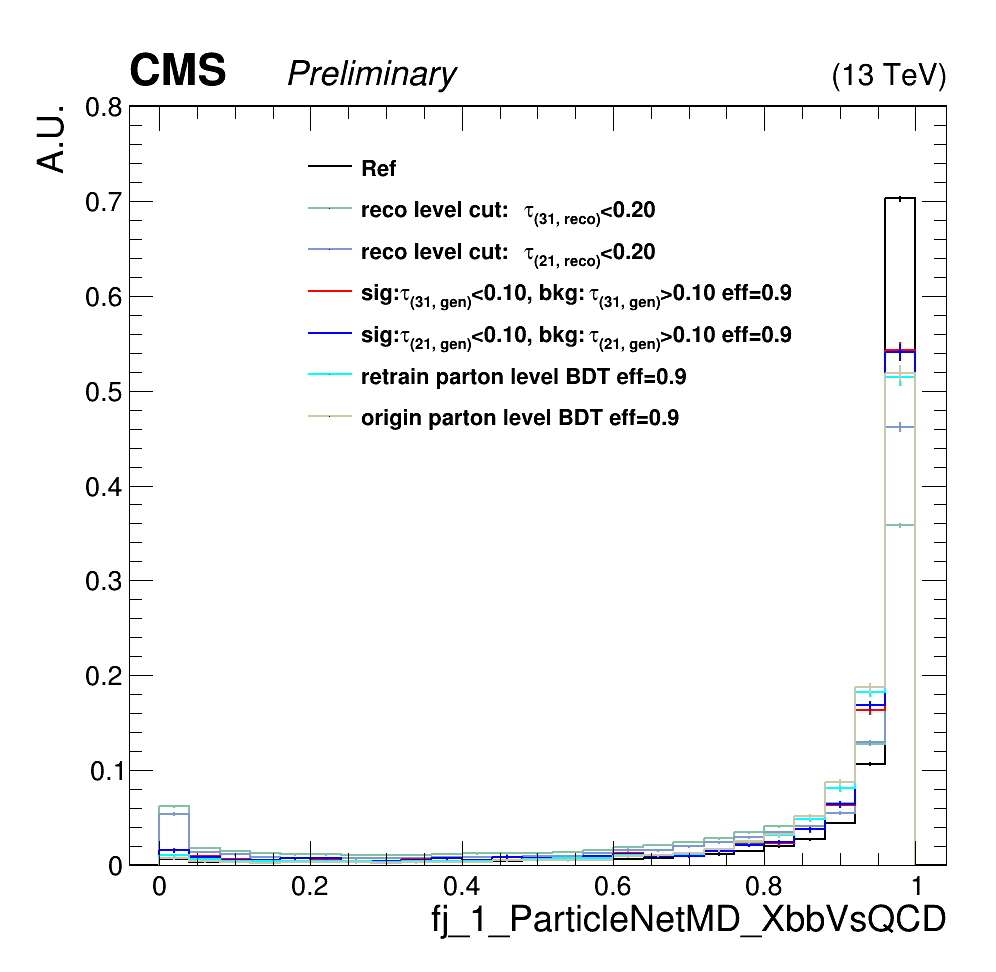

In [79]:
# print(hists)
hists = deepcopy(cuts)
c1 = ROOT.TCanvas("","",1000,1000)
c1.Draw()

legend = ROOT.TLegend(0.30, 0.55, 0.55, 0.85)
# legend.SetNColumns(3)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.025)
legend.SetLineWidth(1)
legend.SetLineStyle(0)

def SetStyle(hist, color, linestyle):
    hist.SetMarkerStyle(0)
    hist.SetLineColor(color)
    hist.SetLineWidth(2)
    hist.SetLineStyle(linestyle)
    hist.SetXTitle(f'{var}')
    hist.SetYTitle('A.U.')

legend.AddEntry(hist_ref, f'Ref')
SetStyle(hist_ref, 1, 1)
hist_ref.Draw('HIST e')
hist_ref.SetMaximum(0.8)
hist_ref.GetXaxis().SetRangeUser(-0.1, 1.1)

legend.AddEntry(hist_recocut_tau31, f'reco level cut: #tau_{{(31, reco)}}<0.20')
SetStyle(hist_recocut_tau31, 30, 1)
hist_recocut_tau31.Draw('HIST SAME e')

legend.AddEntry(hist_recocut_tau21, f'reco level cut: #tau_{{(21, reco)}}<0.20')
SetStyle(hist_recocut_tau21, 38, 1)
hist_recocut_tau21.Draw('HIST SAME e')

color = 2
for hist in hists:
#     for eff in [0.5, 0.7, 0.9]:
    legend.AddEntry(hists[hist][f'hist_{str(eff)}'], f'{hists[hist]["name"]} eff={str(eff)}')
    hists[hist][f'hist_{str(eff)}'].Scale(1./hists[hist][f'hist_{str(eff)}'].Integral())
    SetStyle(hists[hist][f'hist_{str(eff)}'], color, 1)
    hists[hist][f'hist_{str(eff)}'].Draw('HIST e SAME')
    color += 1
    while color in [3,5,6,10] : color += 1

legend.AddEntry(hist_origin, f'origin parton level BDT eff={str(eff)}')
SetStyle(hist_origin, 20, 1)
hist_origin.Draw('HIST SAME e')

legend.Draw("SAME")

ROOT.gPad.RedrawAxis()
CMS_lumi(c1,0,0)
ROOT.gStyle.SetPadRightMargin(0.05)
# c1.SaveAs(f'/eos/user/s/sdeng/www/220519_jet_gp_test/bdt_cut_{var}.png')
c1.SaveAs(f'./plots/20221116//bdt_cut_{var}_{eff}.png')
# ROOT.gPad.SetLogy()

In [34]:
var = 'fj_1_ParticleNetMD_XbbVsQCD'
# var = 'fj_1_DeepAK8_ZHbbvsQCD' # all zero?
# var = 'fj_1_DeepAK8MD_ZHbbvsQCD'
# var = 'fj_1_DeepAK8MD_HbbvsQCD'
# var = 'fj_1_btagDDBvLV2'
# var = 'fj_1_btagHbb'
bdt_name = 'fj1_sfBDT_add'
xbins, xleft, xright = 25, 0, 1.0
eff = 0.9

def GetEvent(file, var, bdt_name, eff, xbins, xleft, xright):
    x = 1
    basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_is_qualified & fj_{x}_nbhadrons>0 & fj_{x}_sj1_sv1_pt>0 & fj_{x}_sj2_sv1_pt>0'
#     basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_nchadrons>0 & fj_{x}_nbhadrons==0 & fj_{x}_is_qualified'
    branches = []
    branches.extend(['fj_1_sj1_sv1_pt','fj_1_sj2_sv1_pt','passHTTrig','passmetfilters','fj_1_pt','fj_1_sdmass','fj_1_is_qualified','fj_1_nbhadrons','fj_1_nchadrons'])
    branches.append(var)
    branches.append(bdt_name)
    df = uproot.open(file+':Events').arrays(branches, library='pd')
    df.query(basesel, inplace=True)
#     wgtexpr = 'genWeight*xsecWeight*puWeight'
#     df['true_weight'] = df.eval(wgtexpr)
#     g_eff, wp = wp_eval(df, bdt_name, eff, xbins, xleft, xright)
#     wp = weighted_quantile(df[bdt_name], [0.9], sample_weight=df['true_weight'])[0]
    wp = weighted_quantile(df[bdt_name], [0.9])[0]
#     print(wp)

    bdt_cut = df.loc[:,bdt_name] > wp
    df = df.loc[bdt_cut,:]
    
    hist = ROOT.TH1D("", "", xbins, xleft, xright)
    for i in trange(0, len(df[var]), desc=f'fill {var} for {file}'):
        hist.Fill(float(df[var].values[i]))
    hist.Scale(1./hist.Integral())
    
    var_cut = f'{var} < 0.10 & {var} > 0'
    df.query(var_cut, inplace=True)
    
    return df, hist

file = f'/home/pku/sdeng/sfbdt/20221116/full_tau31_10_10_fj1_sfBDT/fullAOD_QCD_bbb.root'
df_test, hist = GetEvent(file, var, bdt_name, eff, xbins, xleft, xright)


fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221116/full_tau31_10_10_fj1_sfBDT/fullAOD_QCD_bbb.root: 100%|██████████| 547/547 [00:00<00:00, 235287.08it/s]


In [37]:
df_test

,fj_1_sj1_sv1_pt,fj_1_sj2_sv1_pt,passHTTrig,passmetfilters,fj_1_pt,fj_1_sdmass,fj_1_is_qualified,fj_1_nbhadrons,fj_1_nchadrons,fj_1_ParticleNetMD_XbbVsQCD,fj1_sfBDT_add
9115,108.125000,7.742188,True,True,554.5,156.976547,True,1,2,0.020330,0.944213
13468,15.015625,33.218750,True,True,525.0,142.126617,True,1,1,0.079848,0.854348
16545,33.500000,5.453125,True,True,695.0,191.075165,True,1,1,0.059342,0.926296


In [35]:
df_test.index

Int64Index([9115, 13468, 16545], dtype='int64')

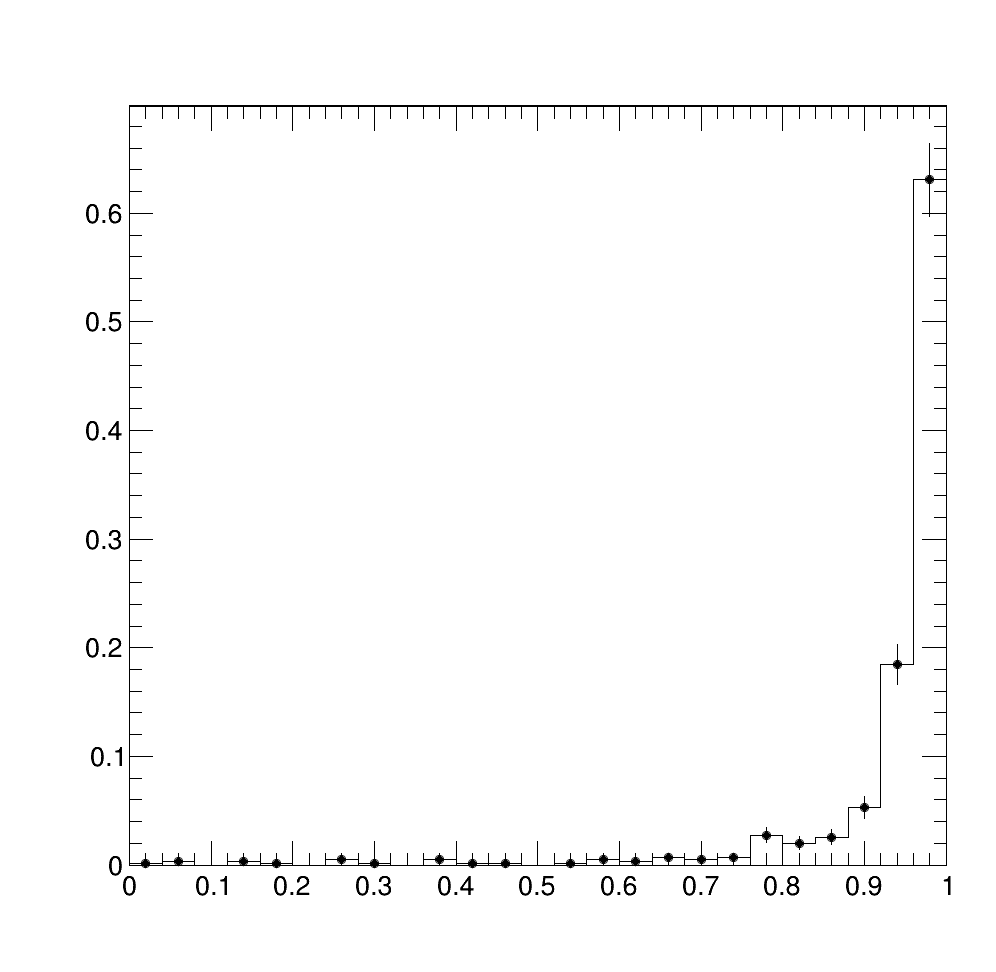

## BDT Score

In [24]:
cuts = {
    'cut1':{
        'name': 'full samples',
        'file': '/home/pku/sdeng/sfbdt/20221106/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root'
    },
    'cut2':{
        'name': 'full samples with tau32&tau31 added',
        'file': '/home/pku/sdeng/sfbdt/20221106/optimization/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root'
    },

}

bdt_name = 'fj1_sfBDT_add'
xbins, xleft, xright = 22, 0, 1.1

def PlotBDT(file, bdt_name, xbins, xleft, xright):
    x = 1
    basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_is_qualified & fj_{x}_nbhadrons>0 & fj_{x}_sj1_sv1_pt>0 & fj_{x}_sj2_sv1_pt>0'
#     basesel = f'passHTTrig & fj_{x}_pt>200 & fj_{x}_sdmass>50 & fj_{x}_sdmass<200 & passmetfilters & fj_{x}_nchadrons>0 & fj_{x}_nbhadrons==0 & fj_{x}_is_qualified'
#     branches = uproot.open(file+':Events').keys(filter_name='fj_1_sf*')
#     print(branches)
#     branches = uproot.open(file+':Events').keys(filter_name='fj_1_ParticleNetMD*')
    branches = []
    branches.extend(['fj_1_sj1_sv1_pt','fj_1_sj2_sv1_pt','puWeight','xsecWeight','genWeight','passHTTrig','passmetfilters','fj_1_pt','fj_1_sdmass','fj_1_is_qualified','fj_1_nbhadrons','fj_1_nchadrons'])
    branches.append(bdt_name)
    df = uproot.open(file+':Events').arrays(branches, library='pd')
    df.query(basesel, inplace=True)
    wgtexpr = 'genWeight*xsecWeight*puWeight'
    df['true_weight'] = df.eval(wgtexpr)
    hist = ROOT.TH1D("", "", xbins, xleft, xright)
    for i in trange(0, len(df[bdt_name]), desc=f'fill {var} for {file}'):
        hist.Fill(float(df[bdt_name].values[i]), float(df['true_weight'].values[i]))
    hist.Scale(1./hist.Integral())
    return hist


file = f'/home/pku/sdeng/sfbdt/20221106/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root'
hist_origin = PlotBDT(file, 'fj_1_sfBDT', xbins, xleft, xright)


for cut in cuts:
#     file = f'/eos/user/s/sdeng/sfbdt/221027/'
#     for eff in [0.5, 0.7, 0.9]:
#         cuts[cut][f'hist_{str(eff)}'] = PlotPNet(file, var, bdt_name, eff, bins, xleft, xright)
    cuts[cut][f'hist_{str(eff)}'] = PlotBDT(cuts[cut]['file'], bdt_name, xbins, xleft, xright)

fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221106/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root: 100%|██████████| 947791/947791 [00:07<00:00, 125568.32it/s]
fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221106/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root: 100%|██████████| 947791/947791 [00:07<00:00, 133303.24it/s]
fill fj_1_ParticleNetMD_XbbVsQCD for /home/pku/sdeng/sfbdt/20221106/optimization/full_tau31_10_10_fj1_sfBDT/mc/qcd-mg_tree.root: 100%|██████████| 947791/947791 [00:07<00:00, 133812.35it/s]


(13 TeV)


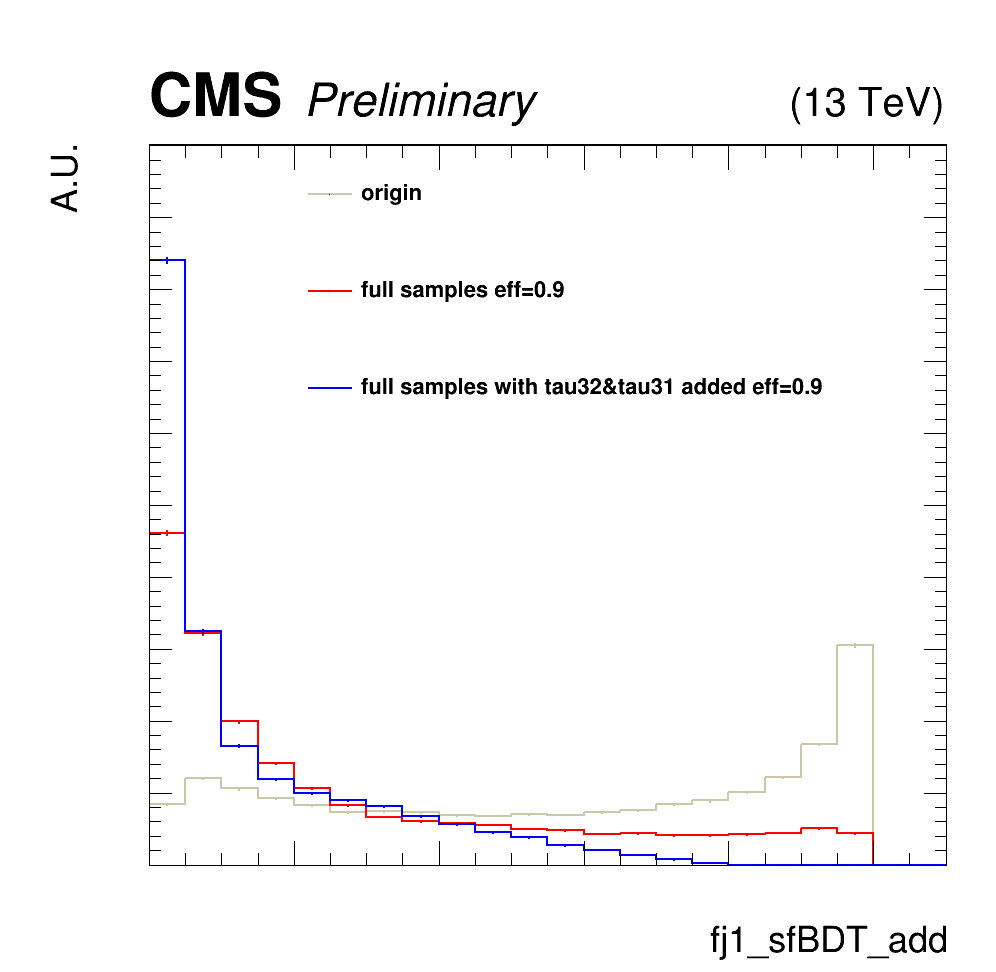

In [28]:
# print(hists)
hists = deepcopy(cuts)
c1 = ROOT.TCanvas("","",1000,1000)
c1.Draw()

legend = ROOT.TLegend(0.30, 0.55, 0.55, 0.85)
# legend.SetNColumns(3)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.025)
legend.SetLineWidth(1)
legend.SetLineStyle(0)

def SetStyle(hist, color, linestyle):
    hist.SetMarkerStyle(0)
    hist.SetLineColor(color)
    hist.SetLineWidth(2)
    hist.SetLineStyle(linestyle)
    hist.SetXTitle(f'{bdt_name}')
    hist.SetYTitle('A.U.')

legend.AddEntry(hist_origin, f'origin')
SetStyle(hist_origin, 20, 1)
hist_origin.Draw('HIST e')
hist_origin.SetMaximum(0.5)

color = 2
for hist in hists:
#     for eff in [0.5, 0.7, 0.9]:
    legend.AddEntry(hists[hist][f'hist_{str(eff)}'], f'{hists[hist]["name"]} eff={str(eff)}')
    hists[hist][f'hist_{str(eff)}'].Scale(1./hists[hist][f'hist_{str(eff)}'].Integral())
    SetStyle(hists[hist][f'hist_{str(eff)}'], color, 1)
    hists[hist][f'hist_{str(eff)}'].Draw('HIST e SAME')
    color += 1
    if color in [3,10] : color += 1

legend.Draw("SAME")

ROOT.gPad.RedrawAxis()
CMS_lumi(c1,0,0)
ROOT.gStyle.SetPadRightMargin(0.05)
# c1.SaveAs(f'/eos/user/s/sdeng/www/220519_jet_gp_test/bdt_cut_{var}.png')
# ROOT.gPad.SetLogy()